In [1]:
import geopandas as gpd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import sklearn.ensemble
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import pickle
import shap

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path_1 = '/home/jovyan/private/Thesis/nai_train_data/'

In [109]:
save_path = '/home/jovyan/private/Thesis/RF_model_results/'

In [7]:
train_data = gpd.read_file(path_1 + 'train_dataV4.shp')


test_data = gpd.read_file(path_1 + 'test_dataV4.shp')

In [8]:
train_data.shape, test_data.shape

((1675, 116), (885, 116))

In [9]:
# Drop the specified columns
train_data = train_data.drop(columns=['ORIG_FID','geometry'])

test_data = test_data.drop(columns=['ORIG_FID','geometry'])

train_data.shape, test_data.shape

((1675, 114), (885, 114))

## Train the model 

In [10]:
# define target and predictors
X = train_data.drop('class', axis=1)
y = train_data['class']

In [11]:
# Assuming 'mean_between_90_and_95' is the target variable, prepare the data
X_1 = test_data.drop('class', axis=1)
y_1 = test_data['class']

In [12]:
X.head()

,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,Dist_Marke,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,13152.90,4726.520,4925.440,16422.20,565.685,16924.80,3801.320,5515.430,16056.200,632.456,...,0.124473,0.939531,0.053395,0.978741,3.612261,0.017469,0.507985,0.699082,0.002039,0.0014
1,10632.00,2420.740,2580.700,14011.80,3255.760,14454.40,1486.610,4396.590,13670.400,2340.940,...,0.135873,0.922205,0.000000,1.000000,2.415003,0.015446,0.527425,0.705740,0.001028,0.0014
2,2376.97,447.214,2668.330,4741.31,6964.190,7810.25,2475.880,2785.680,707.107,3700.000,...,0.229744,0.969769,0.067411,0.973232,3.584198,0.012713,0.480893,0.763273,0.001246,0.0007
3,15305.60,6937.580,7130.920,18681.50,1200.000,19105.00,5966.570,7864.480,18324.000,2823.120,...,0.107156,0.980191,0.106935,0.957815,3.878873,0.009424,0.632054,0.672861,0.000482,0.0006
4,1204.16,921.954,943.398,2302.17,3982.460,4386.34,640.312,860.233,3360.060,5166.240,...,0.138858,0.953633,0.156613,0.934256,3.008063,0.012501,0.574536,0.657669,0.000744,0.0007


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1670    1
1671    1
1672    1
1673    1
1674    1
Name: class, Length: 1675, dtype: int64

In [14]:
X_1

,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,Dist_Marke,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,1843.910,509.902,1486.610,984.886,1746.420,1100.000,1166.190,707.107,1081.670,1565.250,...,0.112929,0.978903,0.000000,1.000000,3.876373,0.011864,0.371422,0.802572,0.001142,0.0002
1,2247.220,2247.220,1456.020,3701.350,5852.350,4904.080,1486.610,9800.510,7218.030,2683.280,...,0.147979,0.970036,0.000000,1.000000,3.557658,0.023592,0.613444,0.626503,0.002043,0.0003
2,2302.170,1118.030,1910.500,1272.790,2765.860,2555.390,2400.000,1746.420,1772.000,3245.000,...,0.154429,0.938728,0.101886,0.957686,2.777336,0.018300,0.661692,0.599165,0.001117,0.0009
3,3046.310,2745.910,6931.090,1941.650,7559.100,7925.910,8697.700,7528.610,5900.850,3289.380,...,0.165052,0.963427,0.156676,0.929563,3.314175,0.030668,0.596748,0.592747,0.002437,0.0003
4,3264.970,1456.020,2088.060,2729.470,5797.410,5671.860,4925.440,1264.910,1878.830,565.685,...,0.198651,0.858526,0.000000,1.000000,2.834503,0.017909,0.396187,0.782296,0.002026,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,670.820,1360.150,721.110,223.607,100.000,447.214,200.000,509.902,316.228,500.000,...,0.109077,0.961018,0.000000,1.000000,3.139140,0.016914,0.619932,0.657760,0.001384,0.0033
881,721.110,1264.910,670.820,141.421,141.421,412.311,100.000,538.516,223.607,447.214,...,0.090938,0.722543,0.003199,0.998747,2.008922,0.012183,0.394646,0.806768,0.001400,0.0028
882,781.025,1170.470,632.456,100.000,223.607,400.000,0.000,583.095,141.421,412.311,...,0.099718,0.977593,0.009201,0.996499,3.807969,0.018282,0.499940,0.725468,0.002099,0.0017
883,761.577,1077.030,608.276,0.000,300.000,412.311,100.000,640.312,100.000,400.000,...,0.105618,0.956087,0.178838,0.920433,3.467291,0.022115,0.738881,0.566080,0.001716,0.0034


In [15]:
y_1

0      0
1      0
2      0
3      0
4      0
      ..
880    1
881    1
882    1
883    1
884    1
Name: class, Length: 885, dtype: int64

In [16]:
# Split the data into training and test sets
X_train, y_train,X_test, y_test = (X, y, X_1, y_1)

In [17]:
X_train.head()

,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,Dist_Marke,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,13152.90,4726.520,4925.440,16422.20,565.685,16924.80,3801.320,5515.430,16056.200,632.456,...,0.124473,0.939531,0.053395,0.978741,3.612261,0.017469,0.507985,0.699082,0.002039,0.0014
1,10632.00,2420.740,2580.700,14011.80,3255.760,14454.40,1486.610,4396.590,13670.400,2340.940,...,0.135873,0.922205,0.000000,1.000000,2.415003,0.015446,0.527425,0.705740,0.001028,0.0014
2,2376.97,447.214,2668.330,4741.31,6964.190,7810.25,2475.880,2785.680,707.107,3700.000,...,0.229744,0.969769,0.067411,0.973232,3.584198,0.012713,0.480893,0.763273,0.001246,0.0007
3,15305.60,6937.580,7130.920,18681.50,1200.000,19105.00,5966.570,7864.480,18324.000,2823.120,...,0.107156,0.980191,0.106935,0.957815,3.878873,0.009424,0.632054,0.672861,0.000482,0.0006
4,1204.16,921.954,943.398,2302.17,3982.460,4386.34,640.312,860.233,3360.060,5166.240,...,0.138858,0.953633,0.156613,0.934256,3.008063,0.012501,0.574536,0.657669,0.000744,0.0007


In [18]:
X_test.head()

,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,Dist_Marke,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,1843.91,509.902,1486.61,984.886,1746.42,1100.00,1166.19,707.107,1081.67,1565.250,...,0.112929,0.978903,0.000000,1.000000,3.876373,0.011864,0.371422,0.802572,0.001142,0.0002
1,2247.22,2247.220,1456.02,3701.350,5852.35,4904.08,1486.61,9800.510,7218.03,2683.280,...,0.147979,0.970036,0.000000,1.000000,3.557658,0.023592,0.613444,0.626503,0.002043,0.0003
2,2302.17,1118.030,1910.50,1272.790,2765.86,2555.39,2400.00,1746.420,1772.00,3245.000,...,0.154429,0.938728,0.101886,0.957686,2.777336,0.018300,0.661692,0.599165,0.001117,0.0009
3,3046.31,2745.910,6931.09,1941.650,7559.10,7925.91,8697.70,7528.610,5900.85,3289.380,...,0.165052,0.963427,0.156676,0.929563,3.314175,0.030668,0.596748,0.592747,0.002437,0.0003
4,3264.97,1456.020,2088.06,2729.470,5797.41,5671.86,4925.44,1264.910,1878.83,565.685,...,0.198651,0.858526,0.000000,1.000000,2.834503,0.017909,0.396187,0.782296,0.002026,0.0018


In [19]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [20]:
y_test.head() 

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [21]:
# Assuming X_train and y_train are already defined
print("NaN values in X_train:", np.isnan(X_train).any())
print("NaN values in X_test:", np.isnan(X_test).any())
# print("NaN values in y_train:", np.isnan(X_val).any())

# Assuming X_train and y_train are already defined
print("NaN values in y_train:", np.isnan(y_train).any())
print("NaN values in y_test:", np.isnan(y_test).any())
# print("NaN values in y_train:", np.isnan(X_val).any())

NaN values in X_train: Dist_ATM      False
Dist_Banks    False
Dist_Clin     False
Dist_Col      False
Dist_ComC     False
              ...  
bERI_Gini_    False
bERI_Shann    False
bERI_Simps    False
bERI_Theil    False
blg_densit    False
Length: 113, dtype: bool
NaN values in X_test: Dist_ATM      False
Dist_Banks    False
Dist_Clin     False
Dist_Col      False
Dist_ComC     False
              ...  
bERI_Gini_    False
bERI_Shann    False
bERI_Simps    False
bERI_Theil    False
blg_densit    False
Length: 113, dtype: bool
NaN values in y_train: False
NaN values in y_test: False


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1675, 113), (885, 113), (1675,), (885,))

## baseline model trained on all 114 features

OOB score: 0.97
Accuracy: 0.86
Confusion Matrix:
 [[449  31]
 [ 91 314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       480
           1       0.91      0.78      0.84       405

    accuracy                           0.86       885
   macro avg       0.87      0.86      0.86       885
weighted avg       0.87      0.86      0.86       885

Dist_ATM: 0.004262483792989025
Dist_Banks: 0.0017465156749911126
Dist_Clin: 0.004037799331398624
Dist_Col: 0.007495295966903736
Dist_ComC: 0.023146345228659278
Dist_Dump: 0.019655345096288447
Dist_Hosp: 0.004527966939742277
Dist_Indus: 0.0024967350605463673
Dist_Kind: 0.009450270116378633
Dist_Marke: 0.003555556347986694
Dist_PlayG: 0.008797085800338465
Dist_Polic: 0.003385652526178043
Dist_Resta: 0.001746160054751981
Dist_River: 0.006073271691010438
Dist_Sch: 0.03342560982840668
Dist_Uni: 0.004762675632123894
NDVI: 0.006640329817564597
ZonalSt_Sl: 0.0016827371957330224

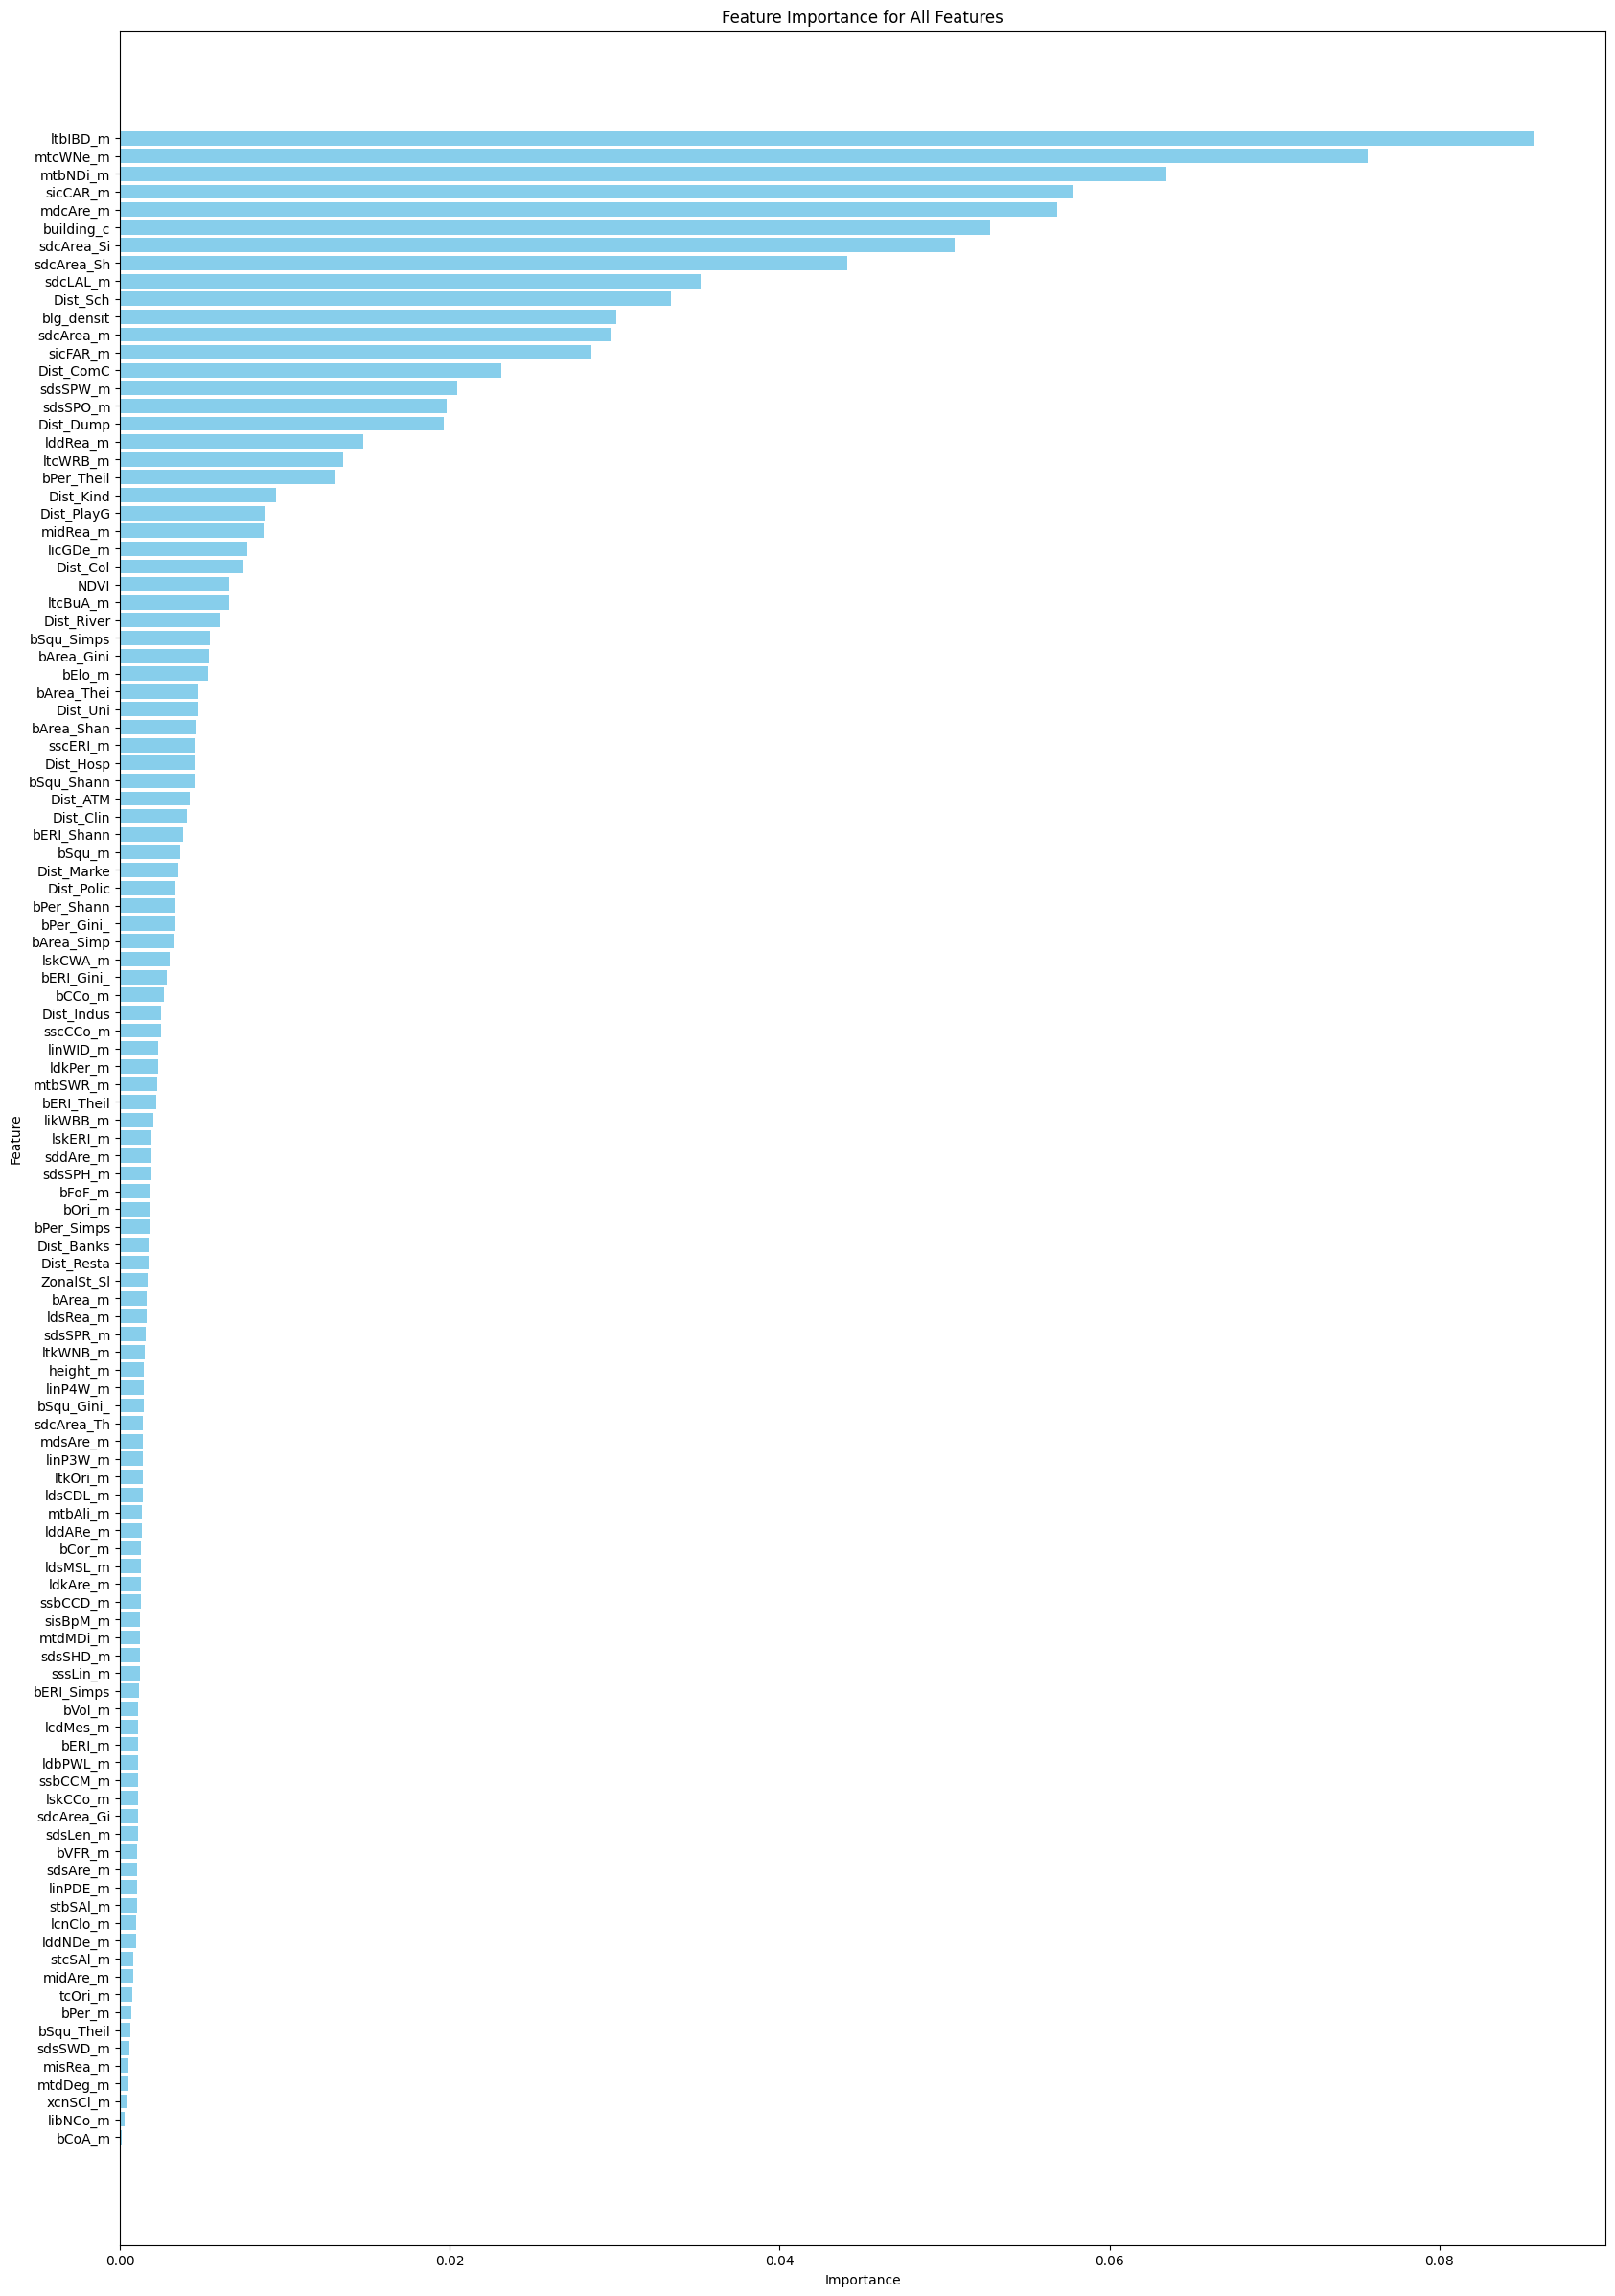

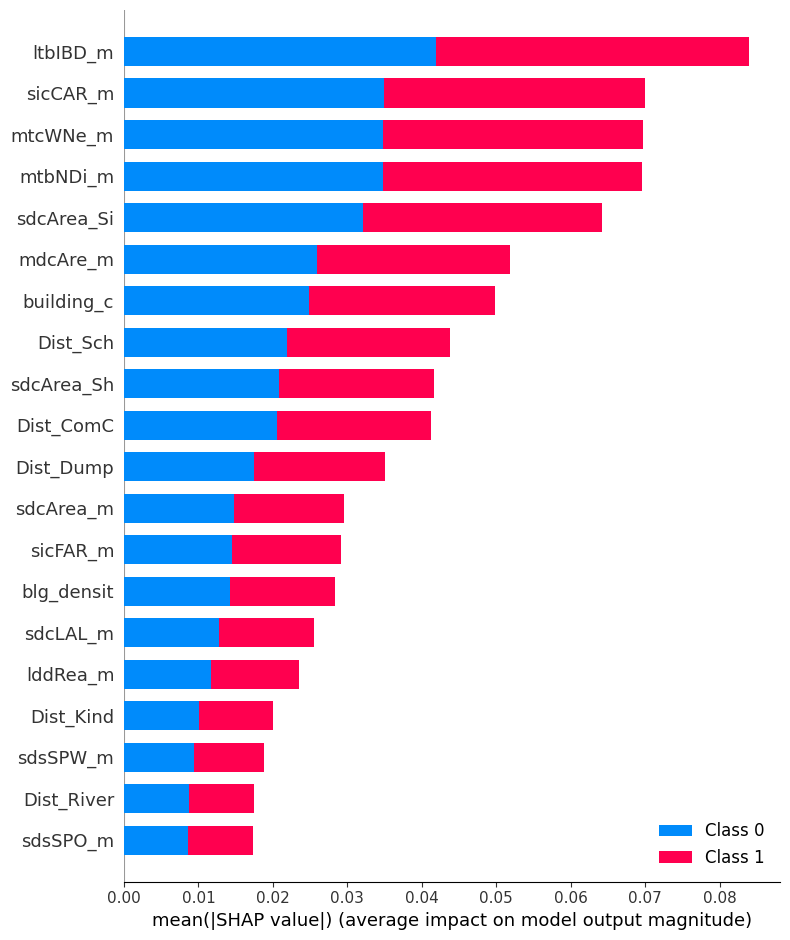

<Figure size 640x480 with 0 Axes>

In [30]:
# Step 2: Train the Random Forest Classifier
rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model_1.fit(X_train, y_train)

# Print the OOB score as an estimation of accuracy on unseen data
print(f"OOB score: {rf_model_1.oob_score_:.2f}")


# Make predictions on the test set
y_pred_m1 = rf_model_1.predict(X_test)

# Compute metrics
accuracy_m1 = accuracy_score(y_test, y_pred_m1)
conf_matrix_m1 = confusion_matrix(y_test, y_pred_m1)
report_m1 = classification_report(y_test, y_pred_m1)

print(f'Accuracy: {accuracy_m1:.2f}')
print("Confusion Matrix:\n", conf_matrix_m1)
print('Classification Report:\n', report_m1)

# Assuming rf_model_2 is your trained Random Forest Classifier model
feature_importances_m1 = rf_model_1.feature_importances_

# Print the feature importance
for feature, importance in zip(X_train.columns, feature_importances_m1):
    print(f"{feature}: {importance}")

# Sort feature importances in descending order
sorted_indices_m1 = feature_importances_m1.argsort()[::-1]
sorted_features_m1 = X_train.columns[sorted_indices_m1]
sorted_importances_m1 = feature_importances_m1[sorted_indices_m1]

    
# Plot the feature importance
plt.figure(figsize=(20, 30))
plt.barh(sorted_features_m1, sorted_importances_m1, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for All Features')
plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top

plt.savefig(save_path + 'feature_importance_plot_allv_model1.png')

plt.show()


# Initialize SHAP explainer
explainer_m1 = shap.TreeExplainer(rf_model_1)
shap_values_m1 = explainer_m1.shap_values(X_train)

# Plot the SHAP values summary plot for all instances
shap.summary_plot(shap_values_m1, X_train, plot_type="bar")
plt.savefig(save_path + 'shap_summary_plot_model1.png')

# Show the plot (optional)
plt.show()

        Feature  Importance
39     ltbIBD_m    0.085789
47     mtcWNe_m    0.075662
36     mtbNDi_m    0.063471
51     sicCAR_m    0.057763
48     mdcAre_m    0.056802
18   building_c    0.052788
98   sdcArea_Si    0.050584
97   sdcArea_Sh    0.044097
43     sdcLAL_m    0.035229
14     Dist_Sch    0.033426
112  blg_densit    0.030117
44    sdcArea_m    0.029722
52     sicFAR_m    0.028609
4     Dist_ComC    0.023146
63     sdsSPW_m    0.020437
66     sdsSPO_m    0.019827
5     Dist_Dump    0.019655
87     lddRea_m    0.014734
50     ltcWRB_m    0.013546
103  bPer_Theil    0.012992


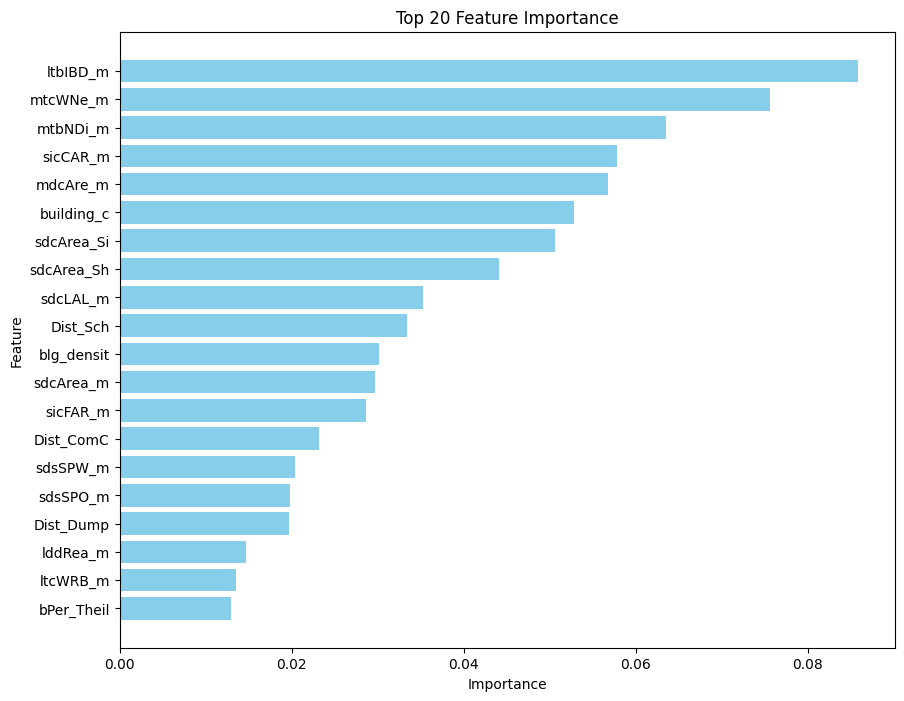

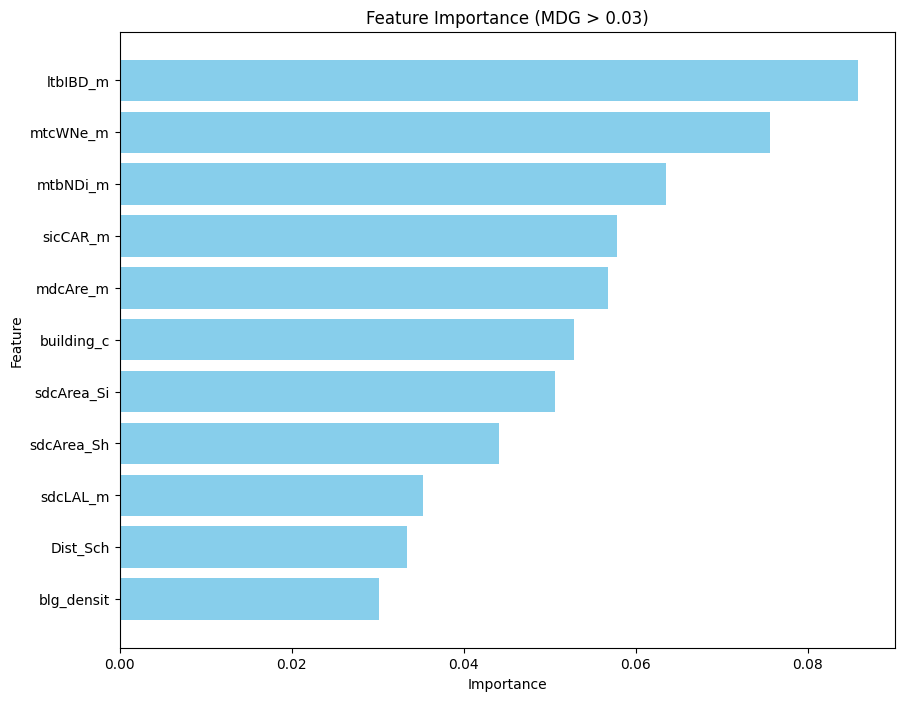

In [26]:
# Assuming 'rf_model_1' is your trained Random Forest Classifier model
feature_importances_m1 = rf_model_1.feature_importances_

# Create a DataFrame with the feature names and their importance scores
feature_importances_m1_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_m1
})

# Sort the DataFrame by the importance score in descending order
sorted_feature_importances_m1_df = feature_importances_m1_df.sort_values(by='Importance', ascending=False)

# Save feature importances to CSV
sorted_feature_importances_m1_df.to_csv(save_path + 'feature_importances_model1.csv')


# Select the top 20 most important features
top_20_features_m1_df = sorted_feature_importances_m1_df.head(20)
print(top_20_features_m1_df)

# Create a bar plot for the top 20 features
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
plt.barh(top_20_features_m1_df['Feature'], top_20_features_m1_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

plt.savefig(save_path + 'feature_importance_plot_t20_model1.png')

# Show the plot
plt.show()

# Filter the DataFrame to include only features with importance greater than 0.03
filtered_features_m1_df = sorted_feature_importances_m1_df[sorted_feature_importances_m1_df['Importance'] > 0.03]

# Sort the filtered DataFrame by importance score in descending order
filtered_features_m1_df = filtered_features_m1_df.sort_values('Importance', ascending=False)

# Create a bar plot for the filtered features
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(filtered_features_m1_df['Feature'], filtered_features_m1_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (MDG > 0.03)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

plt.savefig(save_path + 'feature_importance_plot_mdg>0.03_model1.png')

# Show the plot
plt.show()

# # Now you can use the top 20 features to train a second model
# top_20_features = top_20_features_df['Feature'].tolist()
# X_train_top_20 = X_train[top_20_features]
# X_test_top_20 = X_test[top_20_features]

# select top 20 important features and train a second model

#### prepare the data for the top 20 features

In [27]:
# Now you can use the top 20 features to train a second model
top_20_features = top_20_features_m1_df['Feature'].tolist()
X_train_top_20 = X_train[top_20_features]
X_test_top_20 = X_test[top_20_features]

In [28]:
X_train_top_20

,ltbIBD_m,mtcWNe_m,mtbNDi_m,sicCAR_m,mdcAre_m,building_c,sdcArea_Si,sdcArea_Sh,sdcLAL_m,Dist_Sch,blg_densit,sdcArea_m,sicFAR_m,Dist_ComC,sdsSPW_m,sdsSPO_m,Dist_Dump,lddRea_m,ltcWRB_m,bPer_Theil
0,28.254967,0.065350,17.772677,0.099732,6728.490638,14,0.378110,1.084767,50.088898,316.228,0.0014,769.236661,0.100190,565.685,31.496581,0.782431,16924.800,250.000000,0.000055,0.124473
1,19.555367,0.062136,16.607693,0.152449,5424.576381,14,0.473238,0.820403,40.068005,3178.050,0.0014,664.894688,0.189960,3255.760,22.581272,0.677711,14454.400,162.571429,0.000154,0.135873
2,43.557992,0.049806,30.948144,0.116770,19557.094354,7,0.302027,1.341425,63.178966,2118.960,0.0007,2015.571873,0.132680,6964.190,34.184260,0.875776,7810.250,395.000000,0.000033,0.229744
3,20.803835,0.051507,24.332381,0.082946,7178.955391,6,0.469510,0.832764,48.162552,1581.140,0.0006,872.627932,0.162990,1200.000,27.644110,0.690762,19105.000,530.000000,0.000091,0.107156
4,34.570414,0.057809,16.662125,0.128600,6923.268250,7,0.329582,1.253283,43.604516,509.902,0.0007,760.347438,0.261057,3982.460,27.207196,0.717742,4386.340,372.000000,0.000048,0.138858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,3.369369,0.157072,3.082808,0.492922,801.375726,74,0.988808,0.022032,15.401827,781.025,0.0074,102.999506,0.522063,943.398,20.973753,0.167486,806.226,666.851351,0.000215,0.082527
1671,4.016670,0.135520,3.184040,0.569468,1267.272611,58,0.891727,0.201731,16.567711,781.025,0.0058,119.726120,0.759010,921.954,23.776354,0.161038,761.577,443.517241,0.000219,0.171248
1672,3.855118,0.134746,3.239764,0.500802,893.992198,65,0.983056,0.040503,16.962025,707.107,0.0065,116.503902,0.611298,984.886,21.505677,0.189440,894.427,297.769231,0.000263,0.085233
1673,3.786164,0.155700,2.908921,0.554122,954.160908,65,0.919899,0.144652,15.540809,700.000,0.0065,102.822407,0.690238,1029.560,25.264886,0.160714,894.427,291.384615,0.000294,0.121932


In [29]:
X_test_top_20

,ltbIBD_m,mtcWNe_m,mtbNDi_m,sicCAR_m,mdcAre_m,building_c,sdcArea_Si,sdcArea_Sh,sdcLAL_m,Dist_Sch,blg_densit,sdcArea_m,sicFAR_m,Dist_ComC,sdsSPW_m,sdsSPO_m,Dist_Dump,lddRea_m,ltcWRB_m,bPer_Theil
0,23.008133,0.040874,37.173721,0.017101,8455.165709,2,0.384471,1.117014,56.944935,894.427,0.0002,981.163059,0.084709,1746.420,17.376295,0.380682,1100.000,60.000000,0.000031,0.112929
1,22.054818,0.028109,40.835449,0.034791,25837.861338,3,0.382438,1.149734,102.476193,2024.850,0.0003,3323.329982,0.054273,5852.350,24.321732,0.558889,4904.080,1374.000000,0.000011,0.147979
2,22.620727,0.050159,20.058542,0.150832,10166.902563,9,0.362058,1.173755,52.666604,1236.930,0.0009,1634.570436,0.299963,2765.860,26.796552,0.716292,2555.390,584.000000,0.000030,0.154429
3,49.432990,0.018091,41.103592,0.024007,44610.293645,3,0.201021,1.668527,101.740713,2418.680,0.0003,4575.932251,0.055658,7559.100,46.571275,0.822581,7925.910,63.000000,0.000036,0.165052
4,18.525231,0.077211,13.720968,0.166889,4333.541715,18,0.487317,0.827238,32.243758,1315.290,0.0018,468.261492,0.387318,5797.410,19.086393,0.576234,5671.860,163.722222,0.000031,0.198651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,5.303424,0.088096,4.458146,0.565227,1916.420647,33,0.885063,0.226398,25.918741,100.000,0.0033,220.134020,1.150339,100.000,17.441121,0.179749,447.214,1095.909091,0.000267,0.109077
881,7.942064,0.085078,7.644588,0.415431,2331.961588,28,0.834322,0.298403,27.405537,141.421,0.0028,288.866758,0.967379,141.421,20.460362,0.314225,412.311,1259.178571,0.000222,0.090938
882,9.699975,0.081579,6.315748,0.529187,3328.760510,17,0.676175,0.525336,31.182988,200.000,0.0017,370.540097,0.611485,223.607,23.242550,0.434858,400.000,1357.705882,0.000184,0.099718
883,4.883479,0.112739,3.808053,0.570771,1770.184365,34,0.824890,0.321083,20.096751,141.421,0.0034,187.240860,1.223779,300.000,13.273359,0.188714,412.311,622.500000,0.000305,0.105618


## train model 2 on selected top 20 features

OOB score: 0.97
Accuracy: 0.86
Confusion Matrix:
 [[449  31]
 [ 93 312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       480
           1       0.91      0.77      0.83       405

    accuracy                           0.86       885
   macro avg       0.87      0.85      0.86       885
weighted avg       0.87      0.86      0.86       885

ltbIBD_m: 0.15631571327227906
mtcWNe_m: 0.08966799484752837
mtbNDi_m: 0.1056211742652088
sicCAR_m: 0.11787226336648596
mdcAre_m: 0.03603401261020888
building_c: 0.030900966292344095
sdcArea_Si: 0.11235454440605414
sdcArea_Sh: 0.07801637312537273
sdcLAL_m: 0.020802846721987255
Dist_Sch: 0.04450071908347244
blg_densit: 0.026500245617695053
sdcArea_m: 0.020389887287059906
sicFAR_m: 0.009713603094946826
Dist_ComC: 0.042188597580174916
sdsSPW_m: 0.016676990587885944
sdsSPO_m: 0.012892351646809267
Dist_Dump: 0.03753281867599335
lddRea_m: 0.016098785181139805
ltcWRB_m: 0.01187

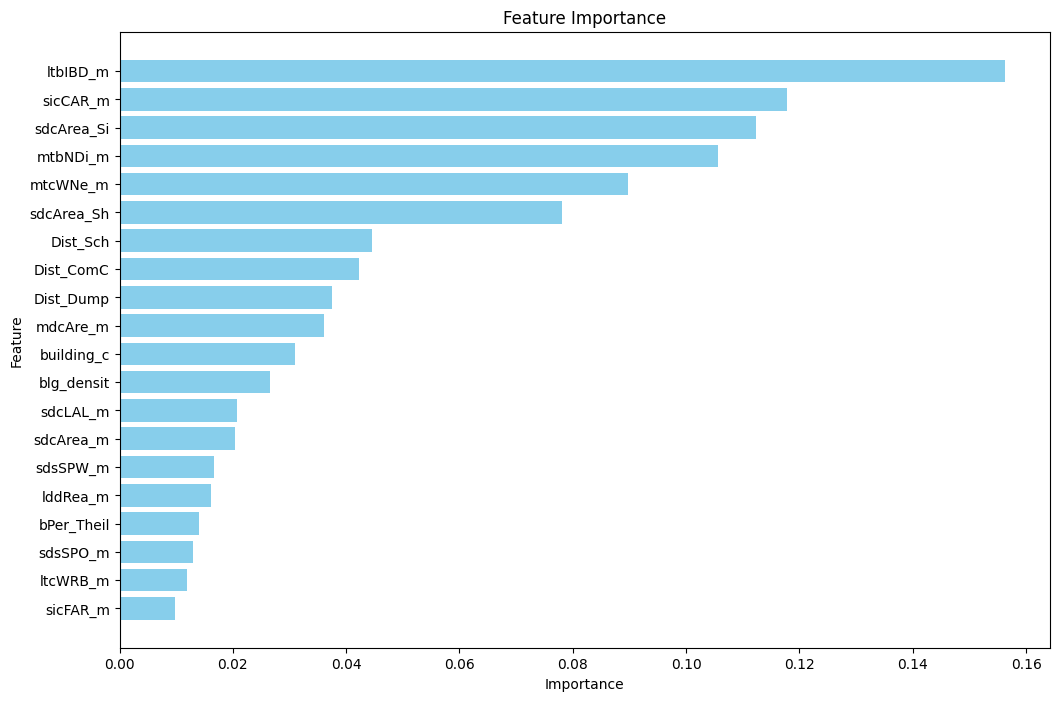

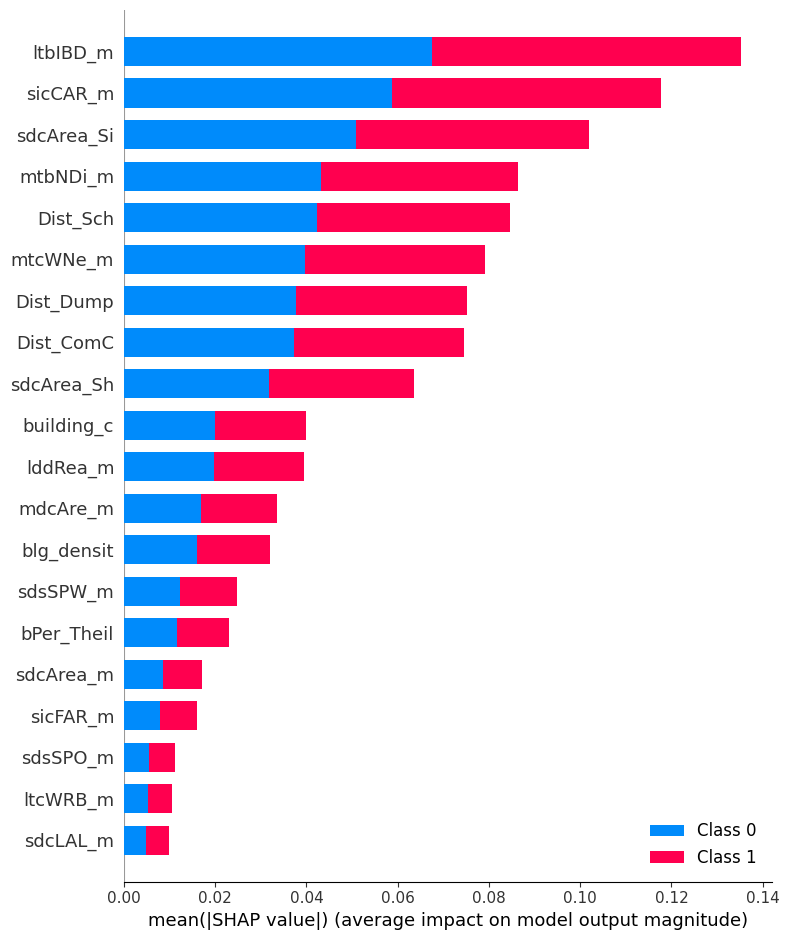

<Figure size 640x480 with 0 Axes>

In [32]:

# Step 2: Train the Random Forest Classifier
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model_2.fit(X_train_top_20, y_train)

# Print the OOB score as an estimation of accuracy on unseen data
print(f"OOB score: {rf_model_2.oob_score_:.2f}")

# Make predictions on the test set
y_pred_m2 = rf_model_2.predict(X_test_top_20)

# Compute metrics
accuracy_m2 = accuracy_score(y_test, y_pred_m2)
conf_matrix_m2 = confusion_matrix(y_test, y_pred_m2)
report_m2 = classification_report(y_test, y_pred_m2)

print(f'Accuracy: {accuracy_m2:.2f}')
print("Confusion Matrix:\n", conf_matrix_m2)
print('Classification Report:\n', report_m2)

# Assuming rf_model_2 is your trained Random Forest Classifier model
feature_importances_m2 = rf_model_2.feature_importances_

# Print the feature importance
for feature, importance in zip(X_train_top_20.columns, feature_importances_m2):
    print(f"{feature}: {importance}")

# Sort feature importances in descending order
sorted_indices = feature_importances_m2.argsort()[::-1]
sorted_features = X_train_top_20.columns[sorted_indices]
sorted_importances = feature_importances_m2[sorted_indices]

    
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_model2.png')
plt.show()

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model_2)
shap_values = explainer.shap_values(X_train_top_20)

# Plot the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train_top_20.iloc[0,:])

# Plot the SHAP values summary plot for all instances
shap.summary_plot(shap_values, X_train_top_20)

plt.savefig(save_path + 'shap_summary_plot_model2.png')

# Show the plot (optional)
plt.show()

## test on accra 

In [55]:
#test on accra 
#define path to daata
path = '/home/jovyan/private/Thesis/Accra/Acc_train_data/'
accra_df = gpd.read_file(path + 'all_formal_grids.shp')

In [69]:
accra_df_2 = gpd.read_file(path + 'slum_train_data.shp')

In [47]:
# Drop the specified columns
accra_df = accra_df.drop(columns=['ORIG_FID','geometry'])

accra_df.shape

(39412, 113)

In [64]:
# Drop the specified columns
accra_df_2 = accra_df_2.drop(columns=['ORIG_FID','geometry', 'class'])

accra_df_2.shape

(2524, 113)

In [48]:
# Make predictions on the accra dataset
accra_pred = rf_model_1.predict(accra_df)
accra_pred

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Make predictions on the accra dataset
accra_pred_2 = rf_model_1.predict(accra_df_2)
accra_pred_2

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



array([0, 0, 1, ..., 1, 0, 0])

In [66]:
unique_values = np.unique(accra_pred_2)

print("Unique values:", unique_values)

Unique values: [0 1]


In [67]:
unique_values = np.unique(accra_pred)

print("Unique values:", unique_values)

Unique values: [0 1]


In [68]:
# Count occurrences of each unique value
unique_values, counts = np.unique(accra_pred_2, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"Value {value} appeared {count} times")

Value 0 appeared 860 times
Value 1 appeared 1664 times


In [56]:
# Add predictions as a new column
accra_df['Predictions'] = accra_pred


In [70]:
# Add predictions as a new column
accra_df_2['Predictions'] = accra_pred_2


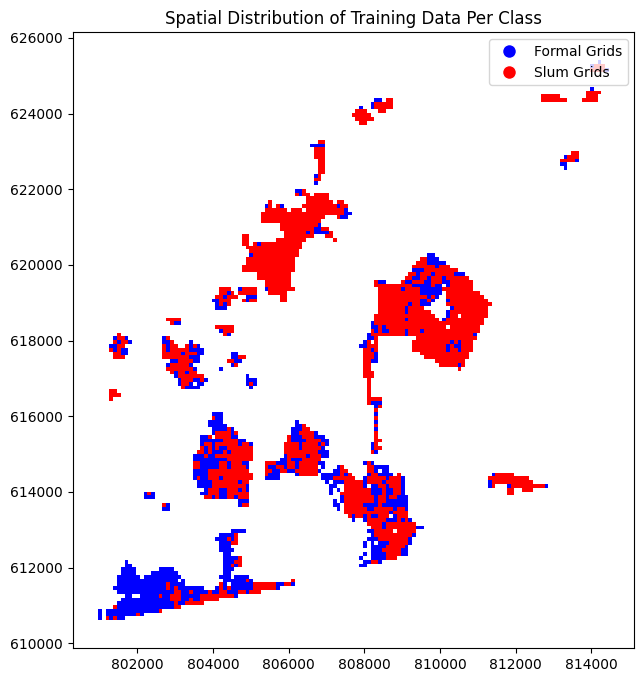

In [71]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = accra_df_2[accra_df_2['Predictions'] == 0]
slum_grids = accra_df_2[accra_df_2['Predictions'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Class')

# Show the plot
plt.show()


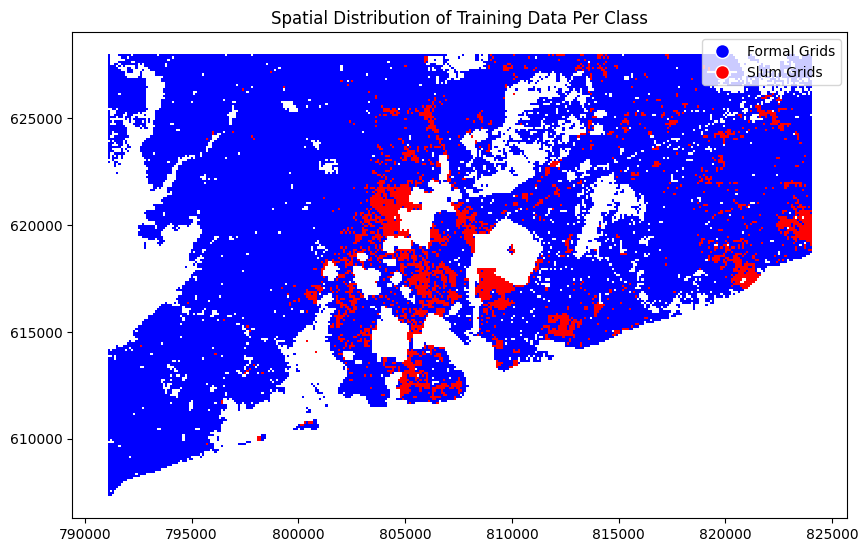

In [57]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = accra_df[accra_df['Predictions'] == 0]
slum_grids = accra_df[accra_df['Predictions'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Class')

# Show the plot
plt.show()


# Model tunning with GridSearch cross-validation
## train complex model using grid search to optimize the best hyper parameters 
### model 3

Best Hyperparameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Accuracy: 0.88
Accuracy: 0.88
Confusion Matrix:
 [[435  45]
 [ 58 347]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       480
           1       0.89      0.86      0.87       405

    accuracy                           0.88       885
   macro avg       0.88      0.88      0.88       885
weighted avg       0.88      0.88      0.88       885



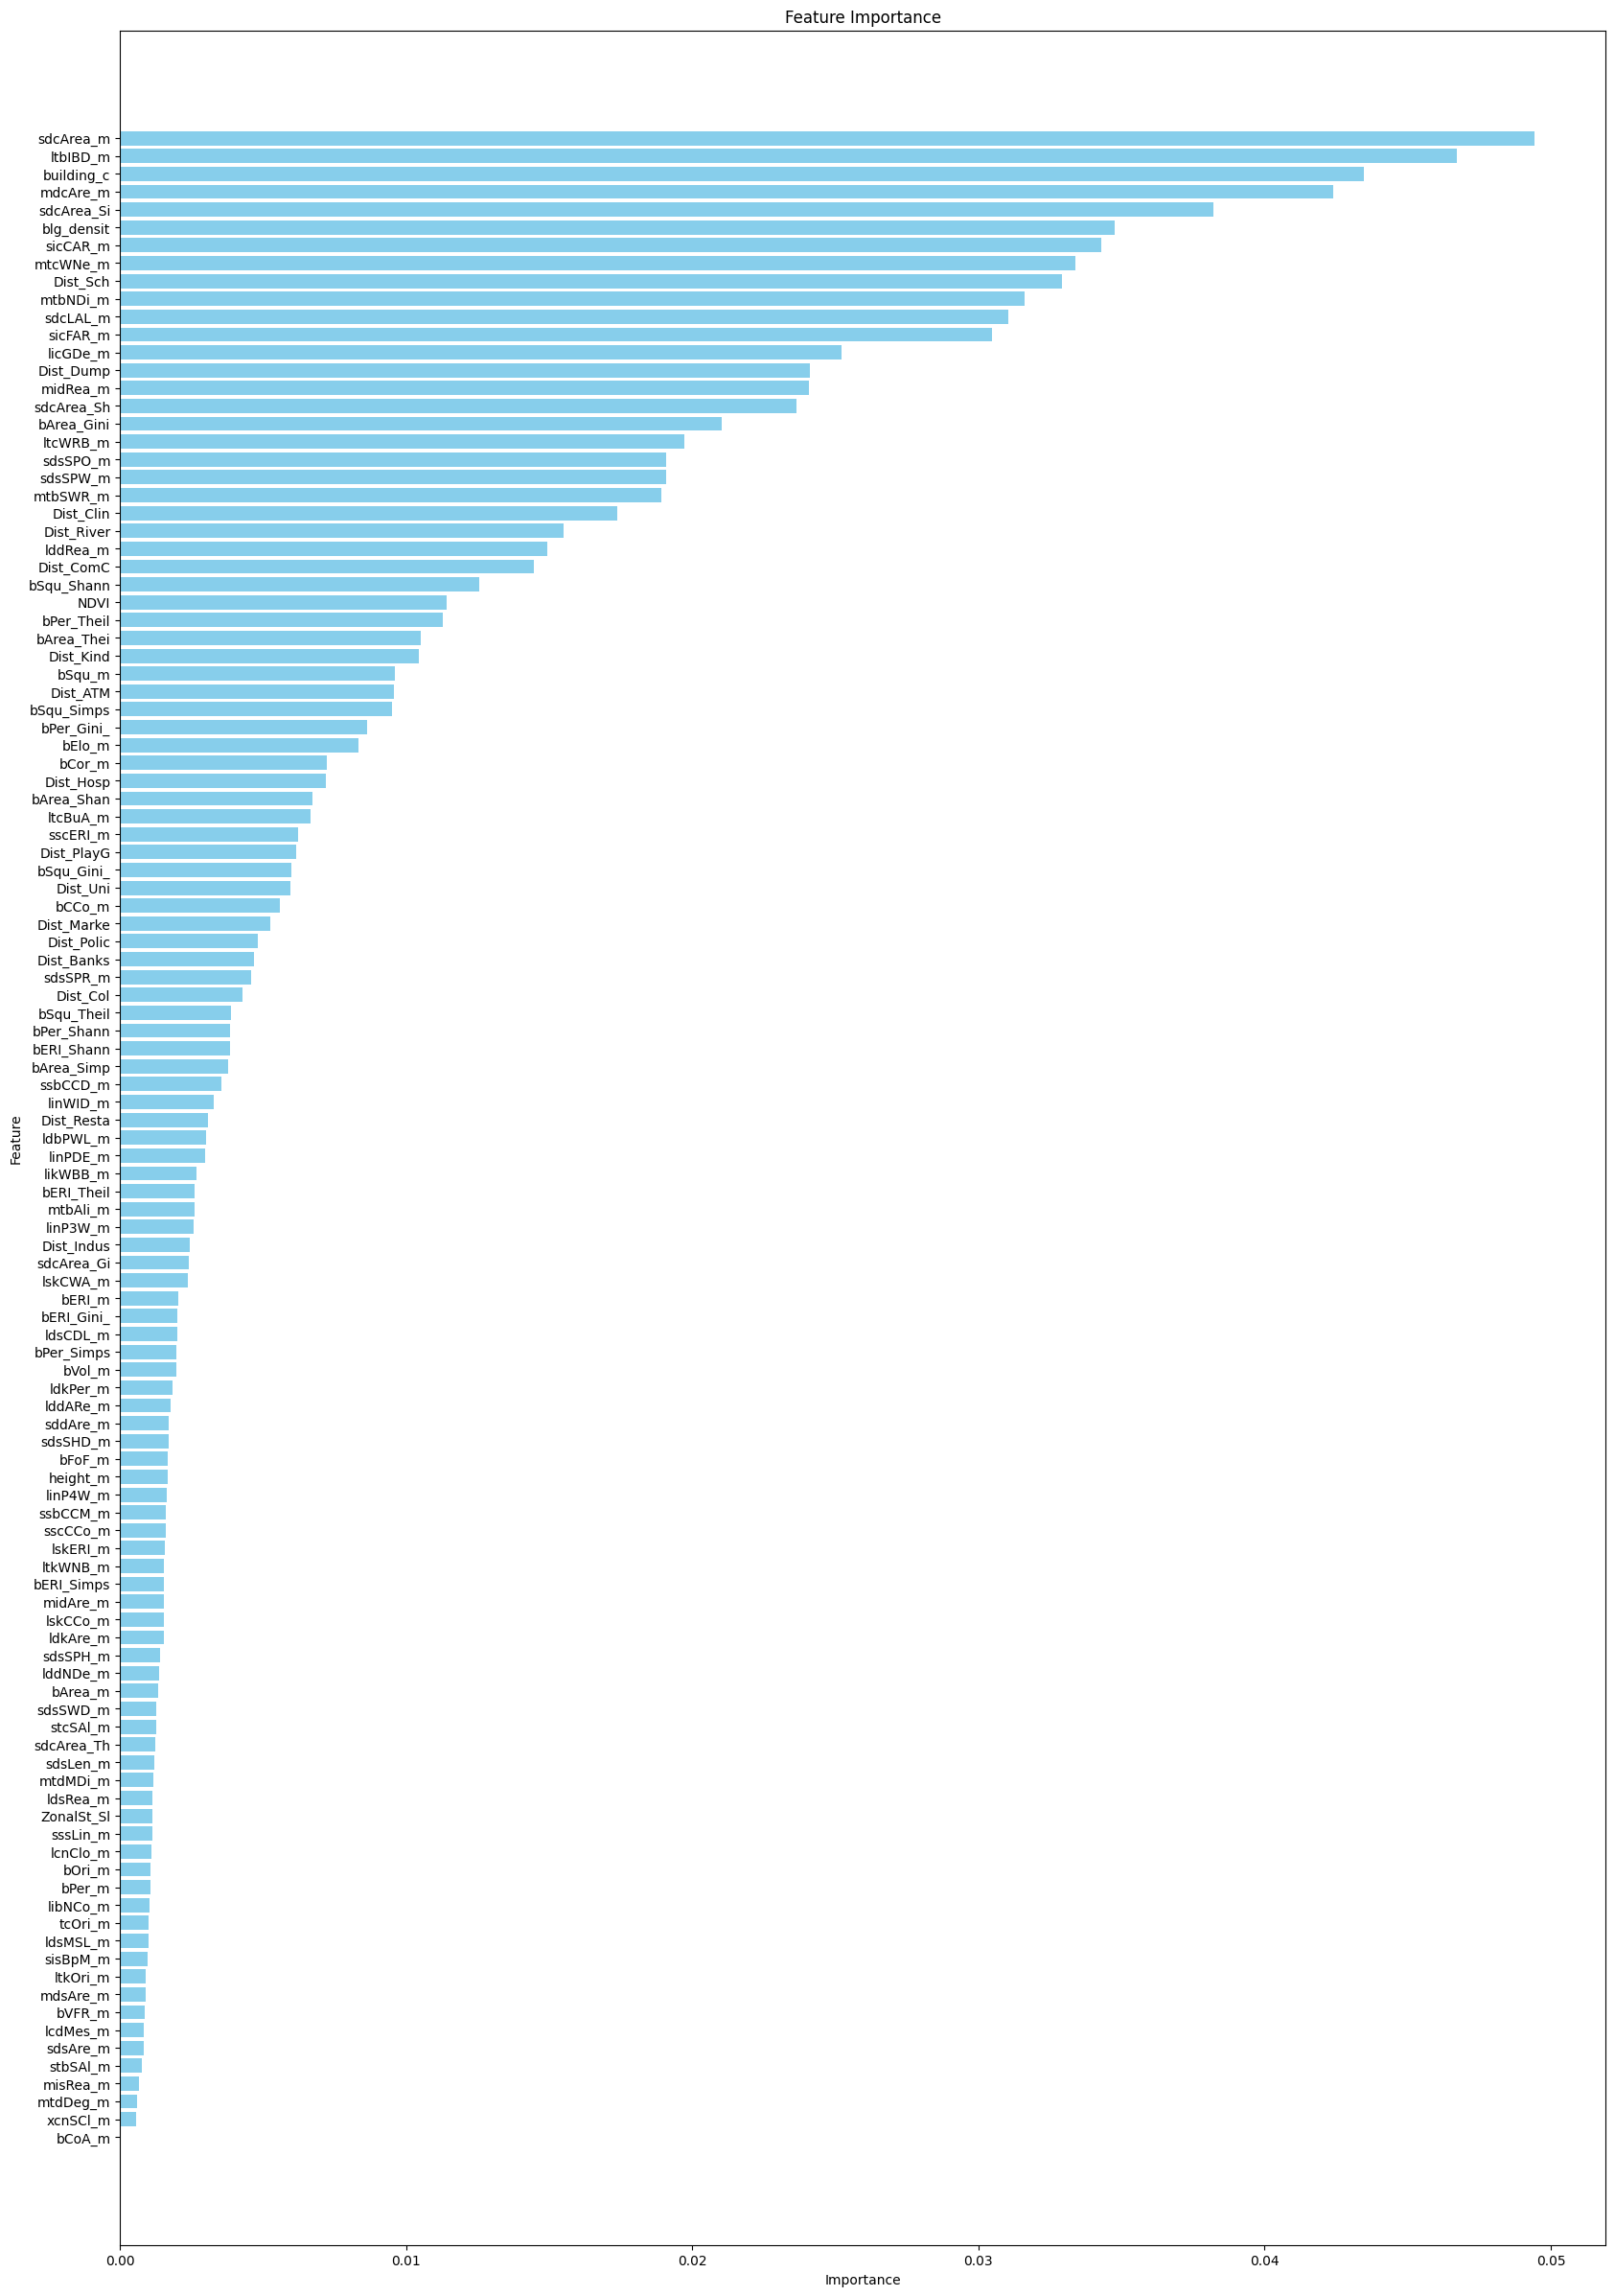

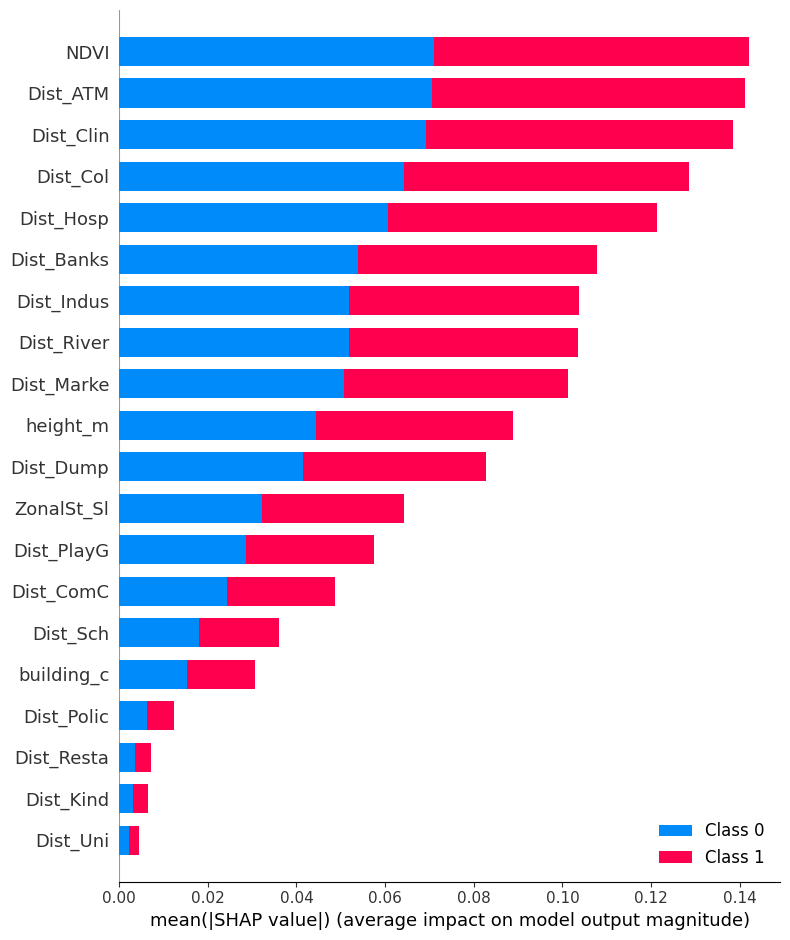

<Figure size 640x480 with 0 Axes>

In [72]:
# Initialize RF regressor
rf_model_3 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for grid search
# Including the square root of the number of features as a heuristic
num_features = 113
max_features_sqrt = int(math.sqrt(num_features))

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features':list(range(3, 13))+ [max_features_sqrt]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model_3, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


# Train the model with the best hyperparameters
accuracy_list = []
for i in range(5):
    best_rf_model_3 = RandomForestClassifier(**best_params, random_state=42)
    best_rf_model_3.fit(X_train, y_train)
    y_pred_m3 = best_rf_model_3.predict(X_test)
    # Compute metrics
    accuracy_m3 = accuracy_score(y_test, y_pred_m3)
    conf_matrix_m3 = confusion_matrix(y_test, y_pred_m3)
    report_m3 = classification_report(y_test, y_pred_m3)
    accuracy_list.append(accuracy_m3)
    
mean_acc = np.mean(accuracy_list)
print(f"Mean Accuracy: {mean_acc:.2f}")


print(f'Accuracy: {accuracy_m3:.2f}')
print("Confusion Matrix:\n", conf_matrix_m3)
print('Classification Report:\n', report_m3)

# Assuming best_rf_model is your trained Random Forest Classifier model with best parameters
feature_importances_m3 = best_rf_model_3.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_m3
})

# Sort feature importances in descending order
features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Save feature importances to CSV
features_df.to_csv(save_path + 'feature_importances_model3.csv')

# Plot the feature importance
plt.figure(figsize=(20, 30))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_model3.png')
plt.show()

# Initialize SHAP explainer
explainer_m3 = shap.TreeExplainer(best_rf_model_3)
shap_values_m3 = explainer.shap_values(X_train)

# Plot the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer_m3.expected_value[1], shap_values_m3[1][0], X_train.iloc[0,:])

# Plot the SHAP values summary plot for all instances
shap.summary_plot(shap_values_m3, X_train)

plt.savefig(save_path + 'shap_summary_plot_model3.png')

# Show the plot (optional)
plt.show()


In [73]:
accuracy_list

[0.8836158192090395,
 0.8836158192090395,
 0.8836158192090395,
 0.8836158192090395,
 0.8836158192090395]

## SAVE THE MODEL

In [74]:
# Save the trained model to a specific folder
model_path = '/home/jovyan/private/Thesis/RF_model/nai_spatial_block_rf_m3.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_rf_model_3, file)

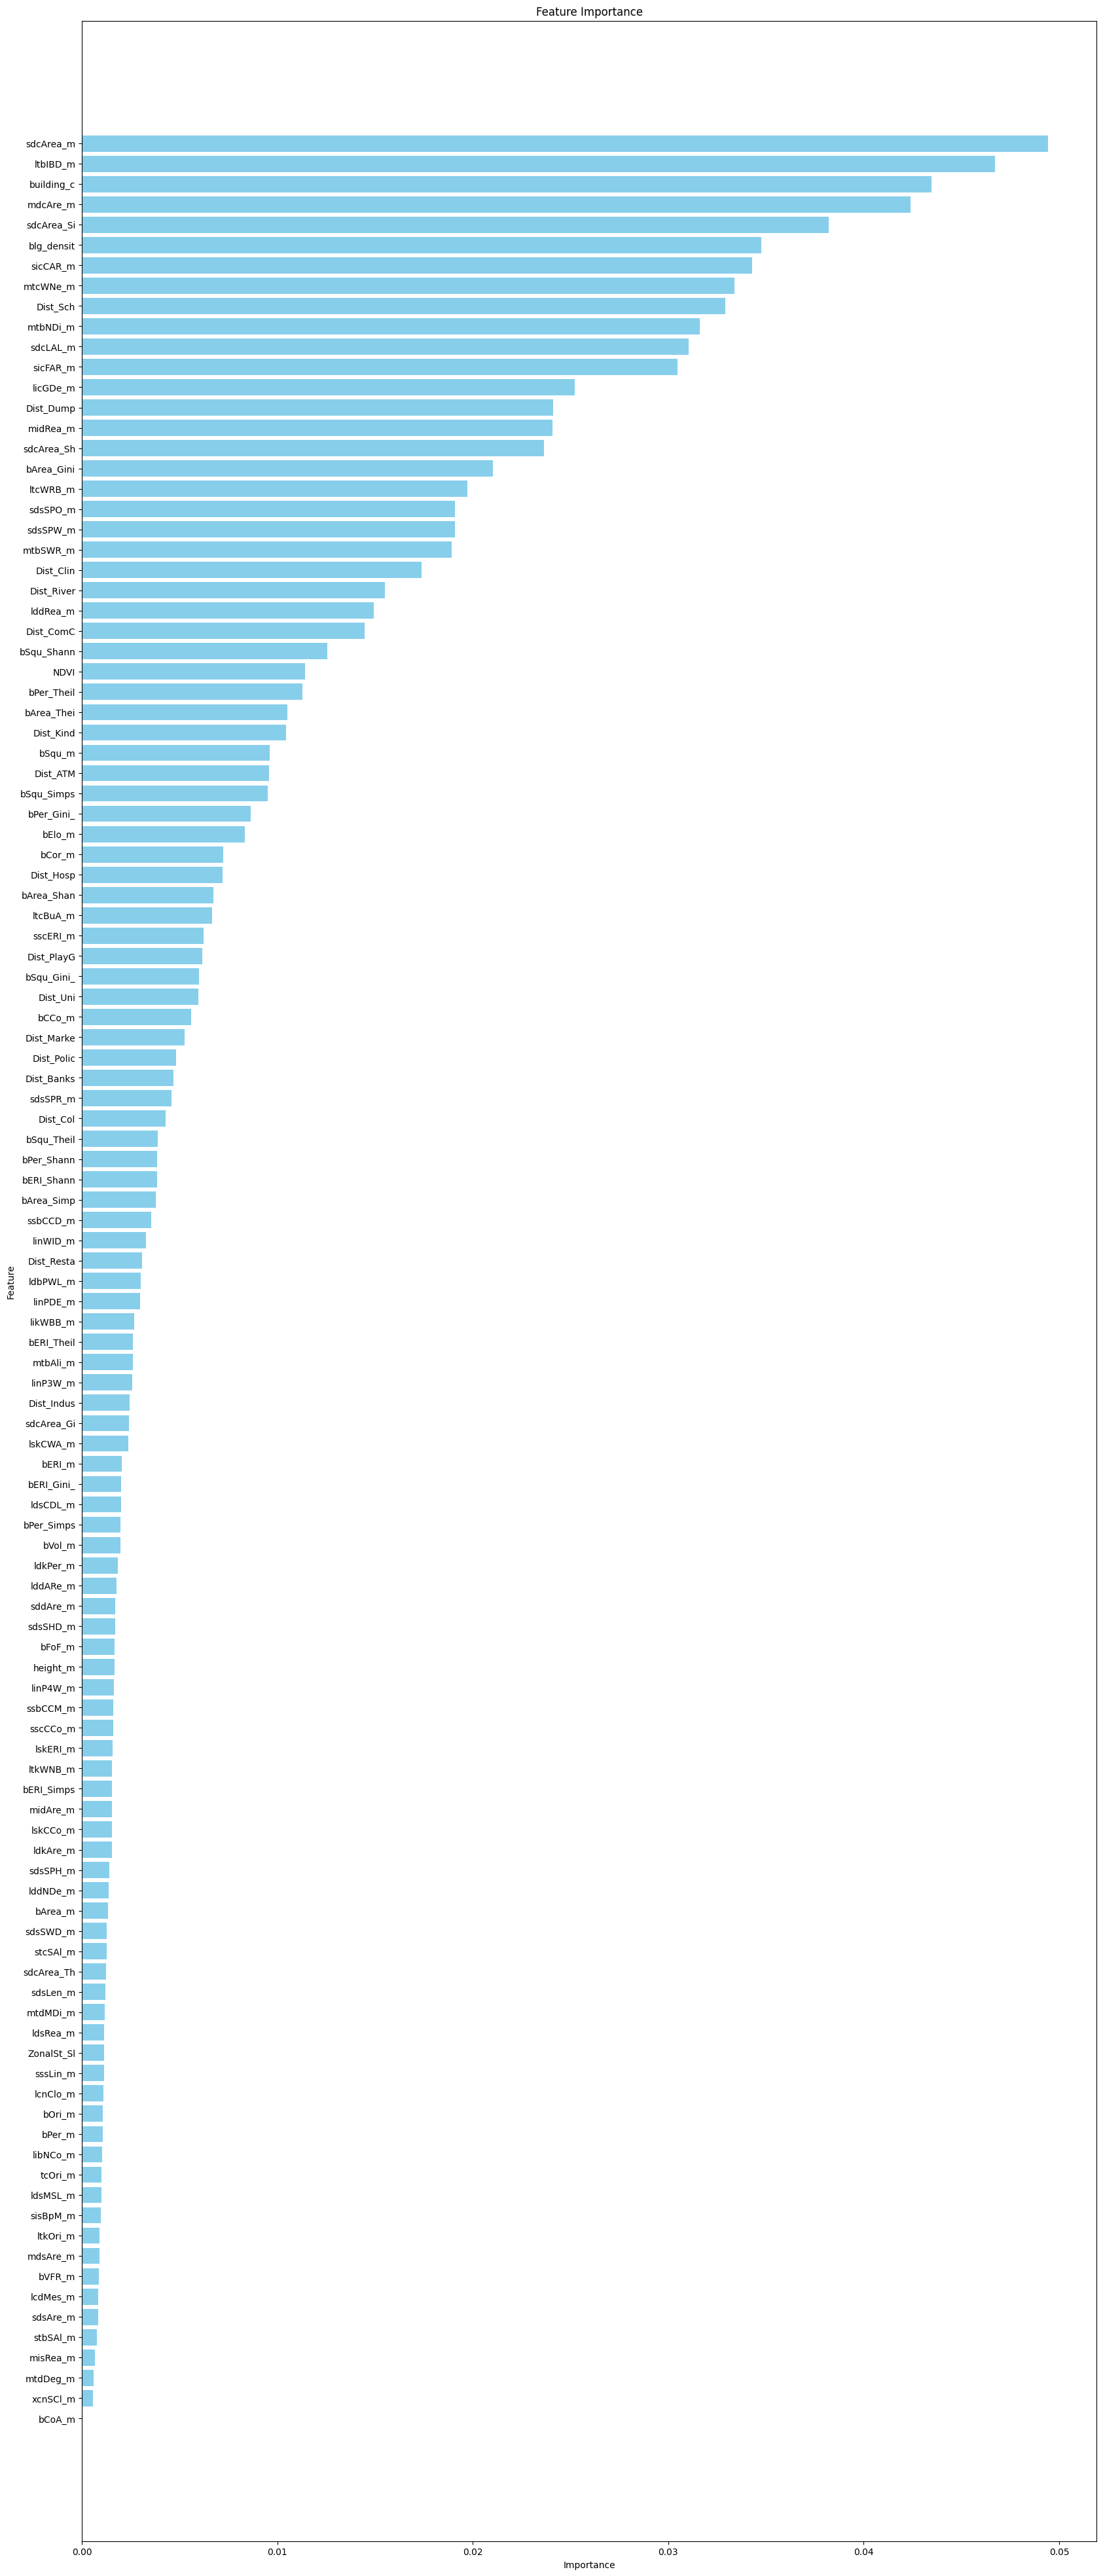

In [76]:
# Assuming best_rf_model is your trained Random Forest Classifier model with best parameters
feature_importances_m3 = best_rf_model_3.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_m3
})

# Sort feature importances in descending order
# features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Sort the DataFrame by importance score in descending order
features_df = features_df.sort_values('Importance', ascending=False)

# Save feature importances to CSV
features_df.to_csv(save_path + 'feature_importances_model3.csv')


# Plot the feature importance
plt.figure(figsize=(20, 50))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_model3.png')
plt.show()

In [77]:
# # Create a DataFrame with feature names and their importance scores
# feature_importances_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance score in descending order
# feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# # Create a bar plot
# plt.figure(figsize=(20, 30))
# plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top

# # Specify the folder and filename where the plot will be saved
# # outputs_path = '/home/jovyan/private/Internship/waruku/Outputs/'
# outputs_path = '/home/jovyan/private/Thesis/RF_model_results/'
# filename = 'feature importance for V2_CV_model.png'

# # Save the plot after reviewing it
# plt.savefig(outputs_path + filename )
# plt.show()

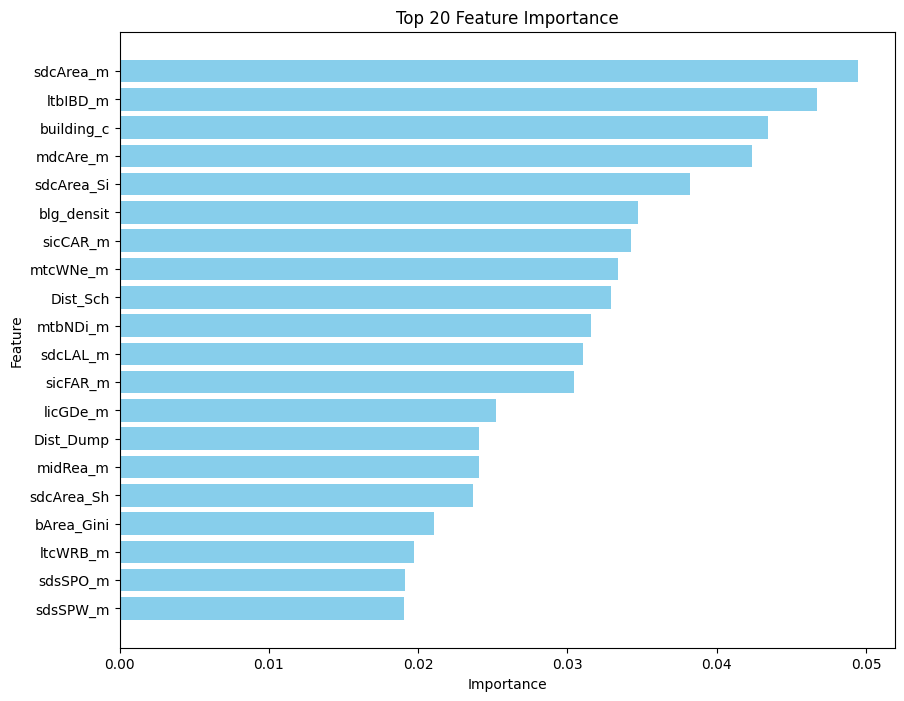

In [78]:
# Select the top 20 most important features for plotting
top_features_df = features_df.head(20)

# Create a bar plot for the top 20 features
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_t20_model3.png')
# Show the plot
plt.show()

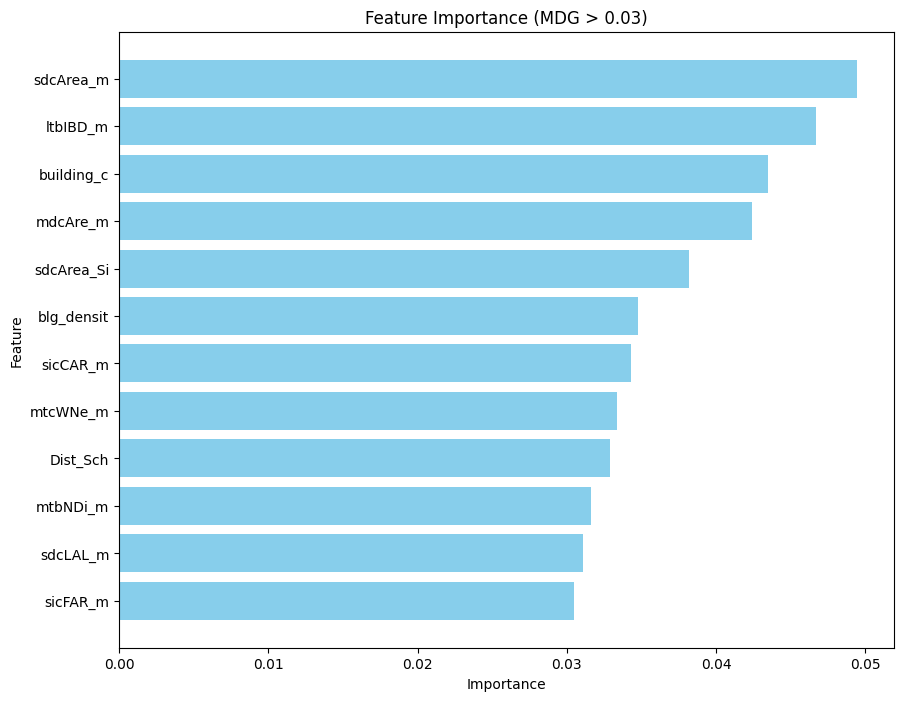

In [79]:
# Filter the DataFrame to include only features with importance greater than 0.03
filtered_features_df = features_df[features_df['Importance'] > 0.03]

# Sort the filtered DataFrame by importance score in descending order
filtered_features_df = filtered_features_df.sort_values('Importance', ascending=False)

# Create a bar plot for the filtered features
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(filtered_features_df['Feature'], filtered_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (MDG > 0.03)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_mdg>0.03_model3.png')
# Show the plot
plt.show()

In [ ]:
## model 4 based on top 20 features and hyperparameter tuning 

In [80]:
# prepare data for top 20 features 
# Now you can use the top 20 features to train a second model
top_20_features_m3 = top_features_df['Feature'].tolist()
X_train_top_20_m3 = X_train[top_20_features_m3]
X_test_top_20_m3 = X_test[top_20_features_m3]

In [81]:
X_train_top_20_m3

,sdcArea_m,ltbIBD_m,building_c,mdcAre_m,sdcArea_Si,blg_densit,sicCAR_m,mtcWNe_m,Dist_Sch,mtbNDi_m,sdcLAL_m,sicFAR_m,licGDe_m,Dist_Dump,midRea_m,sdcArea_Sh,bArea_Gini,ltcWRB_m,sdsSPO_m,sdsSPW_m
0,769.236661,28.254967,14,6728.490638,0.378110,0.0014,0.099732,0.065350,316.228,17.772677,50.088898,0.100190,0.056164,16924.800,61.500000,1.084767,0.477142,0.000055,0.782431,31.496581
1,664.894688,19.555367,14,5424.576381,0.473238,0.0014,0.152449,0.062136,3178.050,16.607693,40.068005,0.189960,0.123087,14454.400,44.857143,0.820403,0.489407,0.000154,0.677711,22.581272
2,2015.571873,43.557992,7,19557.094354,0.302027,0.0007,0.116770,0.049806,2118.960,30.948144,63.178966,0.132680,0.048376,7810.250,55.285714,1.341425,0.600729,0.000033,0.875776,34.184260
3,872.627932,20.803835,6,7178.955391,0.469510,0.0006,0.082946,0.051507,1581.140,24.332381,48.162552,0.162990,0.123526,19105.000,185.666667,0.832764,0.456766,0.000091,0.690762,27.644110
4,760.347438,34.570414,7,6923.268250,0.329582,0.0007,0.128600,0.057809,509.902,16.662125,43.604516,0.261057,0.061990,4386.340,110.000000,1.253283,0.518873,0.000048,0.717742,27.207196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,102.999506,3.369369,74,801.375726,0.988808,0.0074,0.492922,0.157072,781.025,3.082808,15.401827,0.522063,0.538919,806.226,264.797297,0.022032,0.388723,0.000215,0.167486,20.973753
1671,119.726120,4.016670,58,1267.272611,0.891727,0.0058,0.569468,0.135520,781.025,3.184040,16.567711,0.759010,0.632469,761.577,206.758621,0.201731,0.488299,0.000219,0.161038,23.776354
1672,116.503902,3.855118,65,893.992198,0.983056,0.0065,0.500802,0.134746,707.107,3.239764,16.962025,0.611298,0.568604,894.427,147.215385,0.040503,0.378509,0.000263,0.189440,21.505677
1673,102.822407,3.786164,65,954.160908,0.919899,0.0065,0.554122,0.155700,700.000,2.908921,15.540809,0.690238,0.557256,894.427,213.692308,0.144652,0.430448,0.000294,0.160714,25.264886


In [82]:
X_test_top_20_m3

,sdcArea_m,ltbIBD_m,building_c,mdcAre_m,sdcArea_Si,blg_densit,sicCAR_m,mtcWNe_m,Dist_Sch,mtbNDi_m,sdcLAL_m,sicFAR_m,licGDe_m,Dist_Dump,midRea_m,sdcArea_Sh,bArea_Gini,ltcWRB_m,sdsSPO_m,sdsSPW_m
0,981.163059,23.008133,2,8455.165709,0.384471,0.0002,0.017101,0.040874,894.427,37.173721,56.944935,0.084709,0.250160,1100.000,60.000000,1.117014,0.438955,0.000031,0.380682,17.376295
1,3323.329982,22.054818,3,25837.861338,0.382438,0.0003,0.034791,0.028109,2024.850,40.835449,102.476193,0.054273,0.067219,4904.080,953.000000,1.149734,0.502524,0.000011,0.558889,24.321732
2,1634.570436,22.620727,9,10166.902563,0.362058,0.0009,0.150832,0.050159,1236.930,20.058542,52.666604,0.299963,0.142776,2555.390,221.000000,1.173755,0.520535,0.000030,0.716292,26.796552
3,4575.932251,49.432990,3,44610.293645,0.201021,0.0003,0.024007,0.018091,2418.680,41.103592,101.740713,0.055658,0.037321,7925.910,22.000000,1.668527,0.534144,0.000036,0.822581,46.571275
4,468.261492,18.525231,18,4333.541715,0.487317,0.0018,0.166889,0.077211,1315.290,13.720968,32.243758,0.387318,0.197643,5671.860,90.500000,0.827238,0.552909,0.000031,0.576234,19.086393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,220.134020,5.303424,33,1916.420647,0.885063,0.0033,0.565227,0.088096,100.000,4.458146,25.918741,1.150339,1.305034,447.214,164.333333,0.226398,0.445444,0.000267,0.179749,17.441121
881,288.866758,7.942064,28,2331.961588,0.834322,0.0028,0.415431,0.085078,141.421,7.644588,27.405537,0.967379,0.870866,412.311,186.178571,0.298403,0.409371,0.000222,0.314225,20.460362
882,370.540097,9.699975,17,3328.760510,0.676175,0.0017,0.529187,0.081579,200.000,6.315748,31.182988,0.611485,0.450961,400.000,248.235294,0.525336,0.423942,0.000184,0.434858,23.242550
883,187.240860,4.883479,34,1770.184365,0.824890,0.0034,0.570771,0.112739,141.421,3.808053,20.096751,1.223779,1.158966,412.311,115.088235,0.321083,0.426853,0.000305,0.188714,13.273359


## model four

Best Hyperparameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Accuracy: 0.88
[0.8847457627118644, 0.8847457627118644, 0.8847457627118644, 0.8847457627118644, 0.8847457627118644]
Accuracy: 0.88
Confusion Matrix:
 [[440  40]
 [ 62 343]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       480
           1       0.90      0.85      0.87       405

    accuracy                           0.88       885
   macro avg       0.89      0.88      0.88       885
weighted avg       0.89      0.88      0.88       885



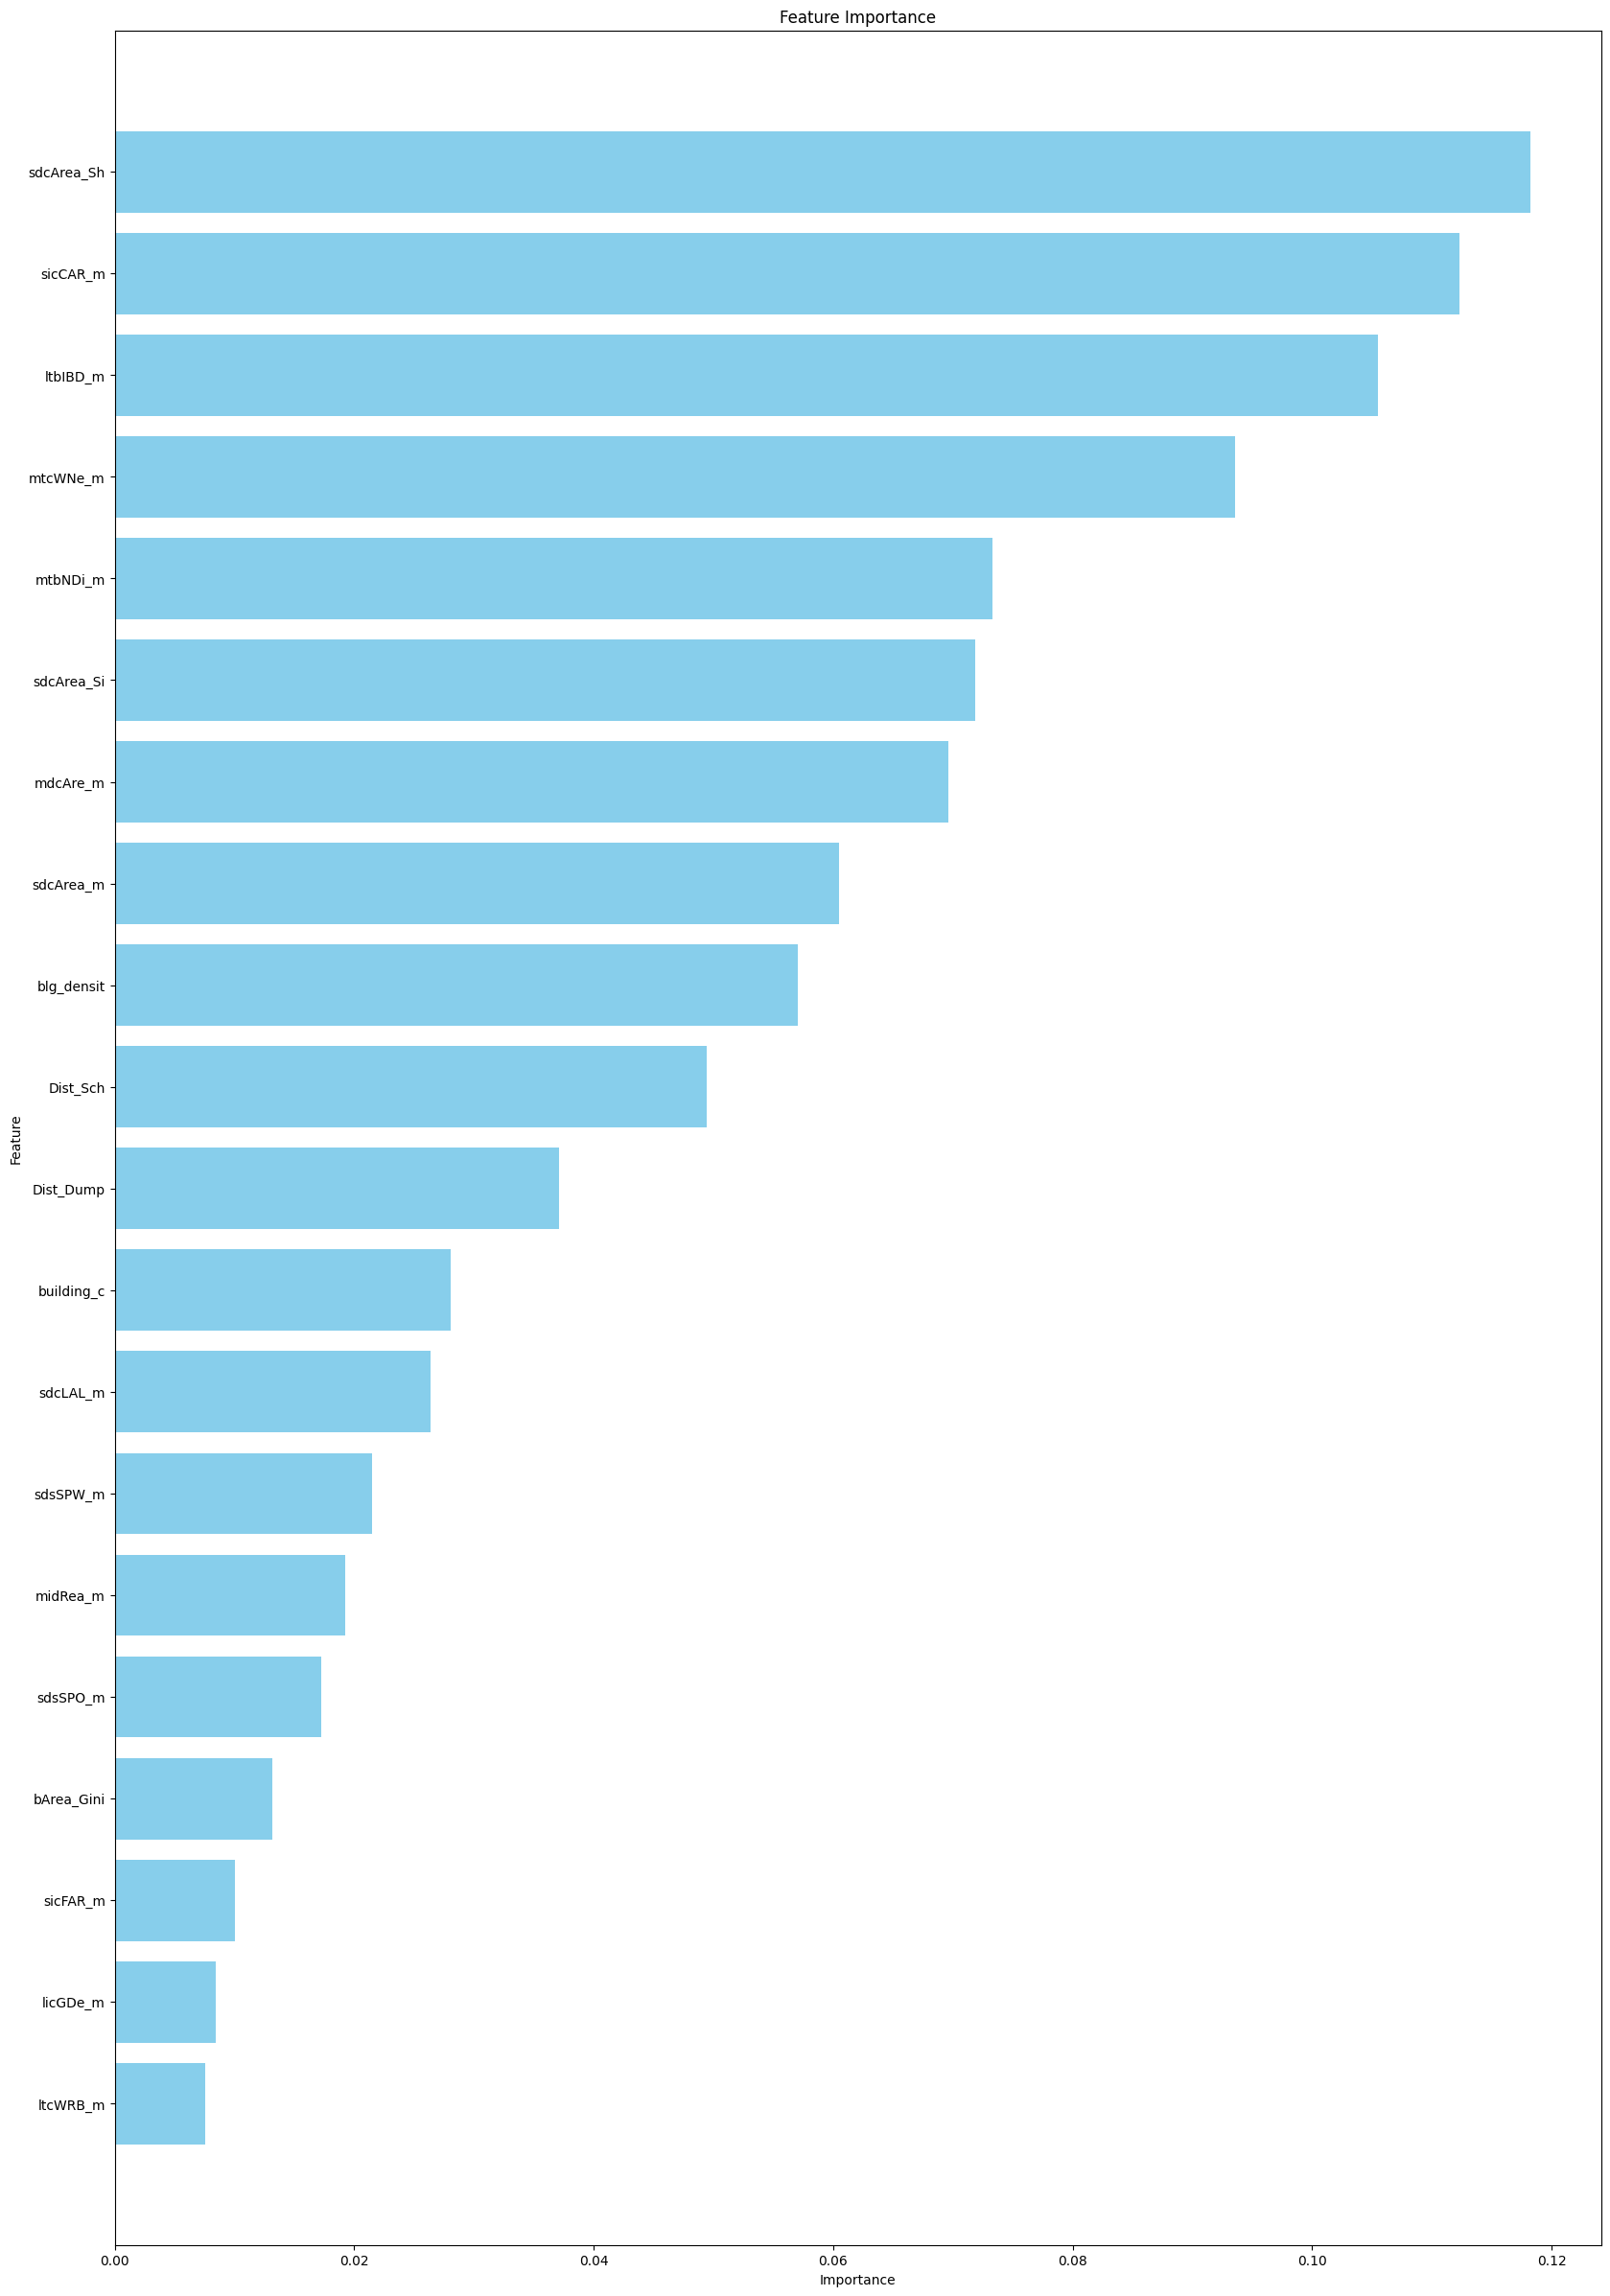

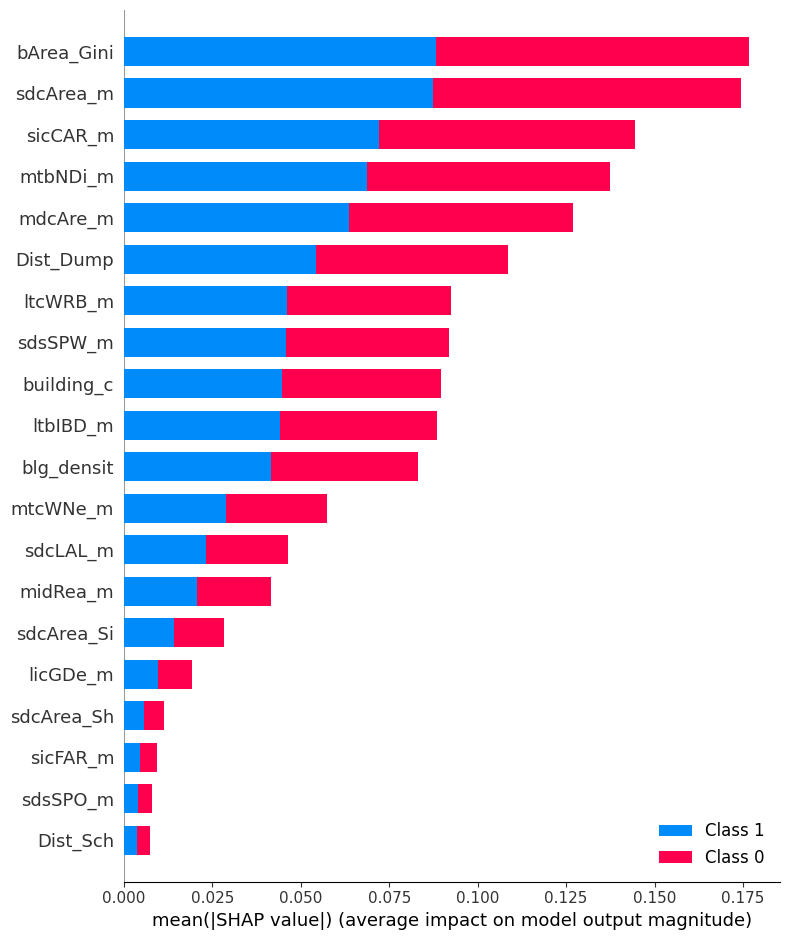

In [83]:
# Initialize RF regressor
rf_model_4 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for grid search
# Including the square root of the number of features as a heuristic
num_features = 20
max_features_sqrt = int(math.sqrt(num_features))

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features':list(range(3, 13))+ [max_features_sqrt]
}

# Perform grid search with cross-validation
grid_search_2 = GridSearchCV(estimator=rf_model_4, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_2.fit(X_train_top_20_m3, y_train)

# Get best hyperparameters
best_params_GS2 = grid_search_2.best_params_
print(f"Best Hyperparameters: {best_params_GS2}")


# Train the model with the best hyperparameters
accuracy_list_m4 = []
for i in range(5):
    best_rf_model_4 = RandomForestClassifier(**best_params_GS2, random_state=42)
    best_rf_model_4.fit(X_train_top_20_m3, y_train)
    y_pred_m4 = best_rf_model_4.predict(X_test_top_20_m3)
    # Compute metrics
    accuracy_m4 = accuracy_score(y_test, y_pred_m4)
    conf_matrix_m4 = confusion_matrix(y_test, y_pred_m4)
    report_m4 = classification_report(y_test, y_pred_m4)
    accuracy_list_m4.append(accuracy_m4)
    
mean_acc_m4 = np.mean(accuracy_list_m4)
print(f"Mean Accuracy: {mean_acc_m4:.2f}")
print(accuracy_list_m4)

print(f'Accuracy: {accuracy_m4:.2f}')
print("Confusion Matrix:\n", conf_matrix_m4)
print('Classification Report:\n', report_m4)

# Assuming best_rf_model is your trained Random Forest Classifier model with best parameters
feature_importances_m4 = best_rf_model_4.feature_importances_

# Create a DataFrame for feature importances
features_df_m4 = pd.DataFrame({
    'Feature': X_train_top_20_m3.columns,
    'Importance': feature_importances_m4
})

# Sort feature importances in descending order
features_df_m4.sort_values(by='Importance', ascending=False, inplace=True)
# Save feature importances to CSV
# features_df_m4.to_csv(save_path + 'feature_importances_model4.csv')

# Plot the feature importance
plt.figure(figsize=(20, 30))
plt.barh(features_df_m4['Feature'], features_df_m4['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_model4.png')
plt.show()

# Initialize SHAP explainer
explainer_m4 = shap.TreeExplainer(best_rf_model_4)
shap_values_m4 = explainer.shap_values(X_train_top_20_m3)

# Plot the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer_m4.expected_value[1], shap_values_m4[1][0], X_train_top_20_m3.iloc[0,:])

# Plot the SHAP values summary plot for all instances
shap.summary_plot(shap_values_m4, X_train_top_20_m3)




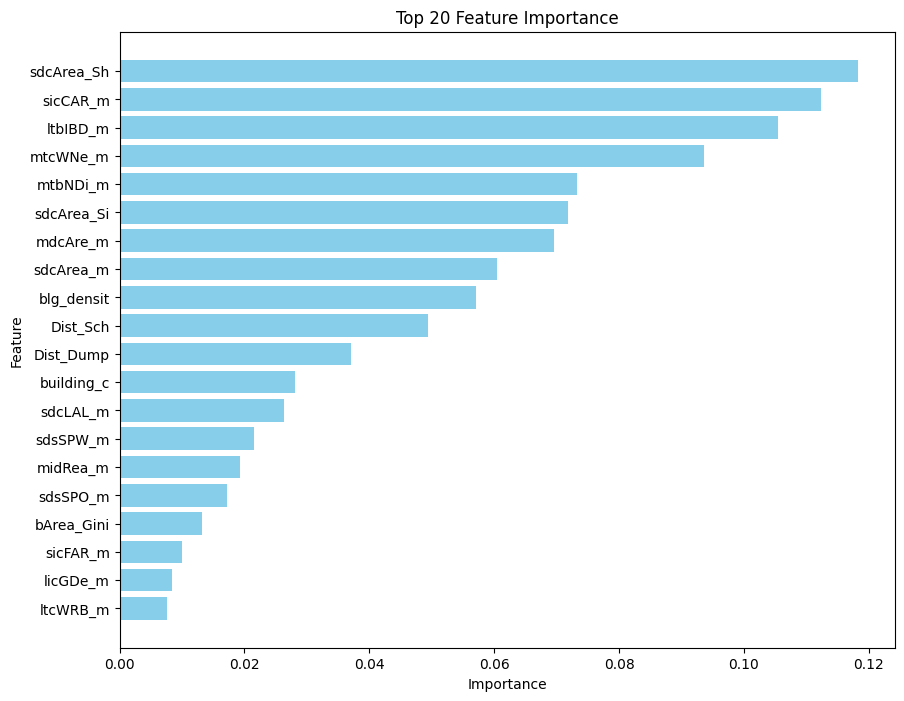

In [85]:
# Select the top 20 most important features for plotting
# top_features_df = features_df.head(20)
# Sort the DataFrame by importance score in descending order
features_df_m4 = features_df_m4.sort_values('Importance', ascending=False)
features_df_m4.to_csv(save_path + 'feature_importances_model4.csv')
# Create a bar plot for the top 20 features
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
plt.barh(features_df_m4['Feature'], features_df_m4['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig(save_path + 'feature_importance_plot_model4a.png')
# Show the plot
plt.show()

## save the model

In [86]:
# Save the trained model to a specific folder
model_path = '/home/jovyan/private/Thesis/RF_model/nai_spatial_block_rf_m4_top20.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_rf_model_4, file)

In [87]:
path_2 = '/home/jovyan/private/Thesis/nai_train_data/'
prediction_data = gpd.read_file(path_2 + 'final_pred_data.shp')

In [88]:
prediction_data.head()

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,geometry
0,5,4188.08,3764.31,3700.00,6637.02,9642.09,9800.51,6676.08,1627.88,9208.69,...,0.348832,0.802469,2.197223,0.014916,0.348832,0.802469,0.001174,10000.0,0.0001,"POLYGON ((266683.509 9871865.525, 266583.509 9..."
1,16,3966.11,3546.83,3544.01,6562.01,9563.47,9732.42,6612.11,1581.14,9119.76,...,0.416021,0.798978,2.246105,0.013299,0.416021,0.798978,0.001320,10000.0,0.0002,"POLYGON ((266883.509 9871765.525, 266783.509 9..."
2,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,0.218885,0.903384,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,"POLYGON ((266983.509 9871665.525, 266883.509 9..."
3,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,0.288721,0.873309,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,"POLYGON ((267083.509 9871665.525, 266983.509 9..."
4,43,3661.97,3255.76,3373.43,6511.53,9503.68,9688.14,6537.58,1552.42,9044.89,...,0.260467,0.869114,2.664485,0.005963,0.483687,0.759725,0.000246,10000.0,0.0007,"POLYGON ((267183.509 9871665.525, 267083.509 9..."


In [89]:
prediction_data.shape

(37128, 119)

In [92]:
# Assuming you have a dataframe called 'df'
prediction_data.rename(columns={
    "proportion": "linP3W_m",
    "proporti_1": "linP4W_m",
    "proporti_2": "linPDE_m",
    "local_clos": "lcnClo_m"
}, inplace=True)


In [96]:
# Assuming you have a dataframe called 'df'
column_mapping = {
    "tcOri_x_m": "tcOri_m",
    "sdcLAL_x_m": "sdcLAL_m",
    "sdcArea_x_": "sdcArea_m",
    "sscCCo_x_m": "sscCCo_m",
    "sscERI_x_m": "sscERI_m",
    "mtcWNe_x_m": "mtcWNe_m",
    "mdcAre_x_m": "mdcAre_m",
    "licGDe_x_m": "licGDe_m",
    "ltcWRB_x_m": "ltcWRB_m",
    "sicCAR_x_m": "sicCAR_m",
    "sicFAR_x_m": "sicFAR_m",
    "stcSAl_x_m": "stcSAl_m"
}

prediction_data.rename(columns=column_mapping, inplace=True)




In [97]:
for col in prediction_data.columns:
    print(col)

ORIG_FID
Dist_ATM
Dist_Banks
Dist_Clin
Dist_Col
Dist_ComC
Dist_Dump
Dist_Hosp
Dist_Indus
Dist_Kind
Dist_Marke
Dist_PlayG
Dist_Polic
Dist_Resta
Dist_River
Dist_Sch
Dist_Uni
NDVI
ZonalSt_Sl
building_c
height_m
area_in_me
bArea_m
bVol_m
bPer_m
bCoA_m
bFoF_m
bVFR_m
bCCo_m
bCor_m
bSqu_m
bERI_m
bElo_m
floor_area
ssbCCM_m
ssbCCD_m
mtbSWR_m
bOri_m
mtbAli_m
mtbNDi_m
libNCo_m
ldbPWL_m
ltbIBD_m
ltcBuA_m
stbSAl_m
nodeID_x_m
tcOri_m
sdcLAL_m
sdcArea_m
sscCCo_m
sscERI_m
mtcWNe_m
mdcAre_m
licGDe_m
ltcWRB_m
sicCAR_m
sicFAR_m
stcSAl_m
ldkAre_m
ldkPer_m
lskCCo_m
lskERI_m
lskCWA_m
ltkOri_m
ltkWNB_m
likWBB_m
sdsLen_m
sdsSPW_m
sdsSPH_m
sdsSPR_m
sdsSPO_m
sdsSWD_m
sdsSHD_m
sssLin_m
sdsAre_m
sisBpM_m
misRea_m
mdsAre_m
ldsMSL_m
ldsRea_m
mtdDeg_m
lcdMes_m
linP3W_m
linP4W_m
linPDE_m
lcnClo_m
ldsCDL_m
xcnSCl_m
mtdMDi_m
lddNDe_m
linWID_m
lddRea_m
lddARe_m
sddAre_m
midRea_m
midAre_m
bArea_Gini
bArea_Shan
bArea_Simp
bArea_Thei
sdcArea_Gi
sdcArea_Sh
sdcArea_Si
sdcArea_Th
bPer_Gini_
bPer_Shann
bPer_Simps
bPer_Theil
bS

In [98]:
# Drop the specified columns
prediction_data_filtered = prediction_data.drop(columns=['ORIG_FID', 'floor_area', 'grid_area', 
                                                         'geometry', 'area_in_me', 'nodeID_x_m'])
prediction_data_filtered.shape

(37128, 113)

In [99]:
# Make predictions on the test set
final_pred_m3 = best_rf_model_3.predict(prediction_data_filtered)
final_pred_m3

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
# Add the predictions as a new column to 'test_data'
prediction_data['predictions_m3'] = final_pred_m3

# Now 'test_data' contains a new column called 'predictions' with the predicted values
prediction_data.head()

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,geometry,predictions_m3
0,5,4188.08,3764.31,3700.00,6637.02,9642.09,9800.51,6676.08,1627.88,9208.69,...,0.802469,2.197223,0.014916,0.348832,0.802469,0.001174,10000.0,0.0001,"POLYGON ((266683.509 9871865.525, 266583.509 9...",0
1,16,3966.11,3546.83,3544.01,6562.01,9563.47,9732.42,6612.11,1581.14,9119.76,...,0.798978,2.246105,0.013299,0.416021,0.798978,0.001320,10000.0,0.0002,"POLYGON ((266883.509 9871765.525, 266783.509 9...",0
2,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,0.903384,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,"POLYGON ((266983.509 9871665.525, 266883.509 9...",0
3,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,0.873309,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,"POLYGON ((267083.509 9871665.525, 266983.509 9...",0
4,43,3661.97,3255.76,3373.43,6511.53,9503.68,9688.14,6537.58,1552.42,9044.89,...,0.869114,2.664485,0.005963,0.483687,0.759725,0.000246,10000.0,0.0007,"POLYGON ((267183.509 9871665.525, 267083.509 9...",0


In [194]:
save_path = '/home/jovyan/private/Thesis/nai_train_data/'
prediction_data.to_file(save_path + 'final_predictions_model3.shp')

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [101]:
top_20_features_m3

['sdcArea_m',
 'ltbIBD_m',
 'building_c',
 'mdcAre_m',
 'sdcArea_Si',
 'blg_densit',
 'sicCAR_m',
 'mtcWNe_m',
 'Dist_Sch',
 'mtbNDi_m',
 'sdcLAL_m',
 'sicFAR_m',
 'licGDe_m',
 'Dist_Dump',
 'midRea_m',
 'sdcArea_Sh',
 'bArea_Gini',
 'ltcWRB_m',
 'sdsSPO_m',
 'sdsSPW_m']

In [102]:
# prepare data for top 20 features fot the final model predictions 
# Now you can use the top 20 features to train a second model
top_20_features_m3 = top_features_df['Feature'].tolist()
prediction_top_20_m3 = prediction_data_filtered[top_20_features_m3]
prediction_top_20_m3.shape, prediction_top_20_m3.columns




((37128, 20),
 Index(['sdcArea_m', 'ltbIBD_m', 'building_c', 'mdcAre_m', 'sdcArea_Si',
        'blg_densit', 'sicCAR_m', 'mtcWNe_m', 'Dist_Sch', 'mtbNDi_m',
        'sdcLAL_m', 'sicFAR_m', 'licGDe_m', 'Dist_Dump', 'midRea_m',
        'sdcArea_Sh', 'bArea_Gini', 'ltcWRB_m', 'sdsSPO_m', 'sdsSPW_m'],
       dtype='object'))

In [103]:
# Make predictions on the test set
final_pred_m4 = best_rf_model_4.predict(prediction_top_20_m3)
final_pred_m4

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
# Add the predictions as a new column to 'test_data'
prediction_data['predictions_m4'] = final_pred_m4

# Now 'test_data' contains a new column called 'predictions' with the predicted values
prediction_data.head()

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,geometry,predictions_m3,predictions_m4
0,5,4188.08,3764.31,3700.00,6637.02,9642.09,9800.51,6676.08,1627.88,9208.69,...,2.197223,0.014916,0.348832,0.802469,0.001174,10000.0,0.0001,"POLYGON ((266683.509 9871865.525, 266583.509 9...",0,0
1,16,3966.11,3546.83,3544.01,6562.01,9563.47,9732.42,6612.11,1581.14,9119.76,...,2.246105,0.013299,0.416021,0.798978,0.001320,10000.0,0.0002,"POLYGON ((266883.509 9871765.525, 266783.509 9...",0,0
2,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,"POLYGON ((266983.509 9871665.525, 266883.509 9...",0,0
3,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,"POLYGON ((267083.509 9871665.525, 266983.509 9...",0,0
4,43,3661.97,3255.76,3373.43,6511.53,9503.68,9688.14,6537.58,1552.42,9044.89,...,2.664485,0.005963,0.483687,0.759725,0.000246,10000.0,0.0007,"POLYGON ((267183.509 9871665.525, 267083.509 9...",0,0


In [105]:
save_path = '/home/jovyan/private/Thesis/nai_predictions/'
prediction_data.to_file(save_path + 'final_predictions_model3_model4.shp')

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


0    33014
1     4114
Name: predictions_m3, dtype: int64


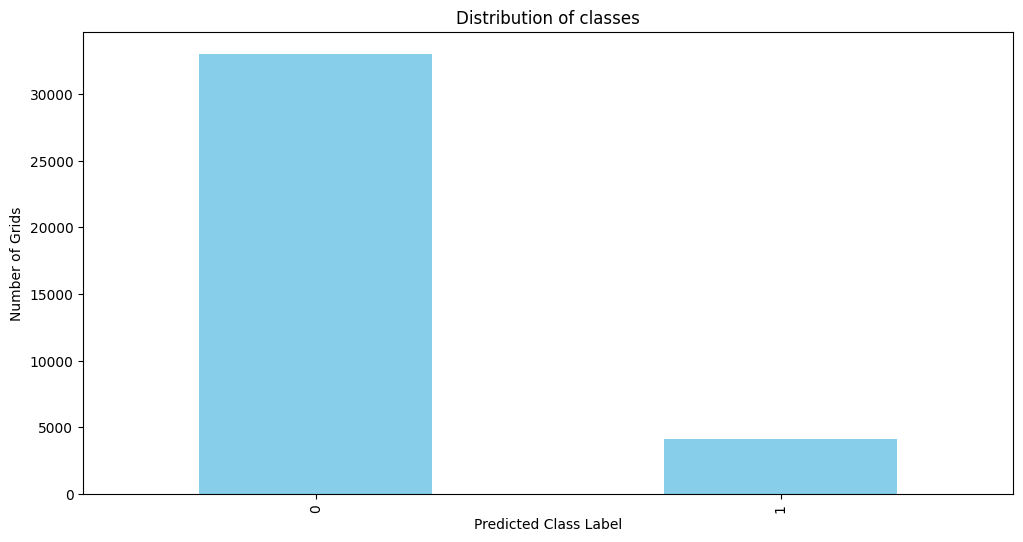

In [206]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_class = prediction_data['predictions_m3'].value_counts()

print(counts_per_class)

# Create a bar chart for the distribution
counts_per_class.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Predicted Class Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of classes')

# Show the bar chart
plt.show()

0    32990
1     4138
Name: predictions_m4, dtype: int64


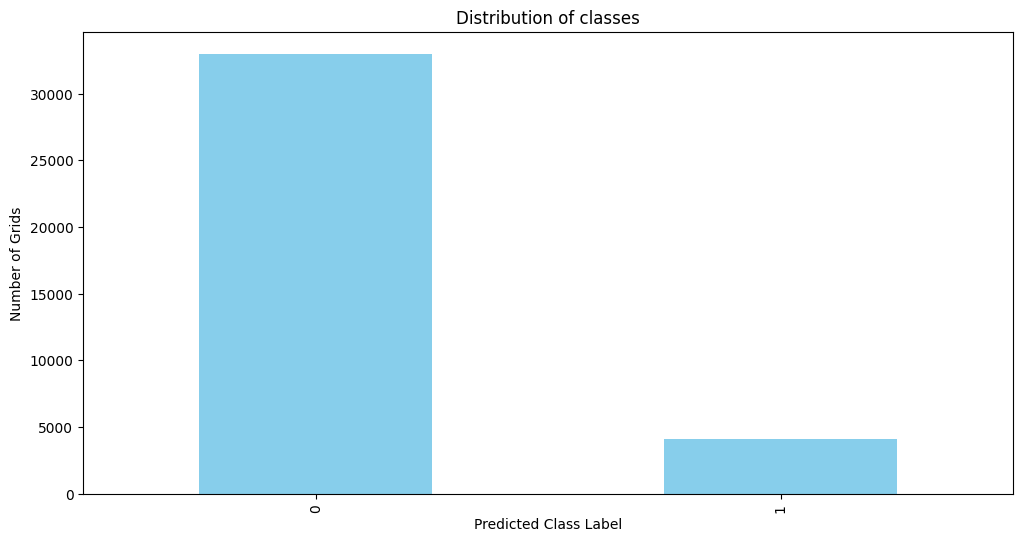

In [207]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_class_m4 = prediction_data['predictions_m4'].value_counts()
print(counts_per_class_m4)


# Create a bar chart for the distribution
counts_per_class_m4.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Predicted Class Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of classes')

# Show the bar chart
plt.show()

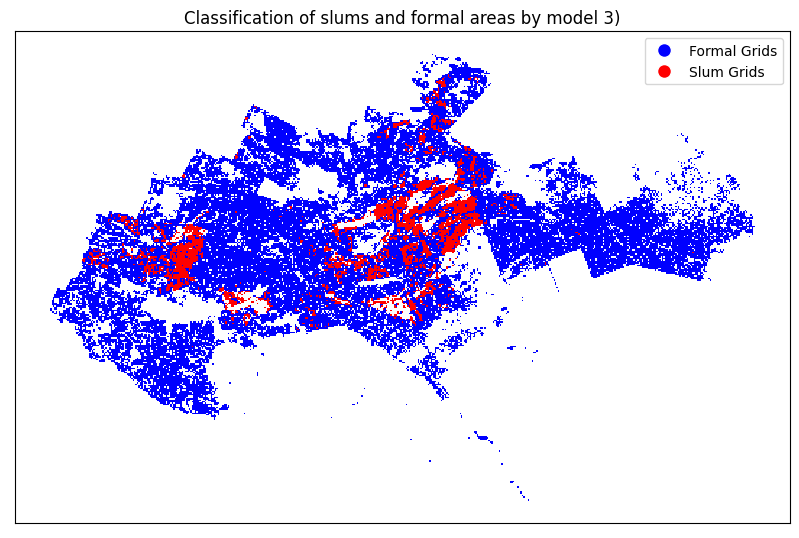

In [110]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids_m3 = prediction_data[prediction_data['predictions_m3'] == 0]
slum_grids_m3 = prediction_data[prediction_data['predictions_m3'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids_m3.plot(ax=ax, color='blue')
slum_grids_m3.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Classification of slums and formal areas by model 3)')

plt.savefig(save_path + 'nairobi_final_prediction_model3.png')

# Show the plot
plt.show()

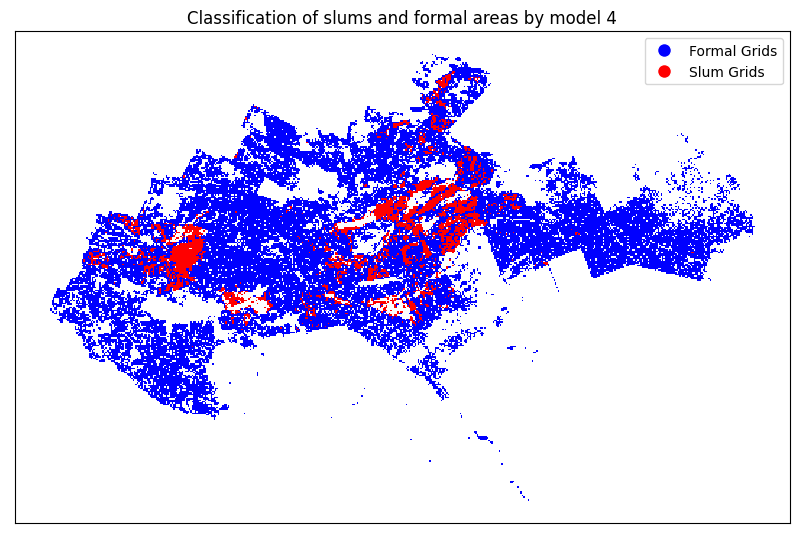

In [111]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = prediction_data[prediction_data['predictions_m4'] == 0]
slum_grids = prediction_data[prediction_data['predictions_m4'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Classification of slums and formal areas by model 4')

plt.savefig(save_path + 'nairobi_final_prediction_model_4.png')

# Show the plot
plt.show()

In [ ]:
### predict accra using the pretrained model 3 and 4

In [112]:
accra_df_2 = gpd.read_file(path + 'slum_train_data.shp')
accra_df_2.head(), accra_df_2.shape

(   ORIG_FID  ZonalSt_Sl      NDVI  Dist_ATM  Dist_Banks  Dist_Clin  Dist_Col  \
 0     94226     2.76836  0.151978   1077.03     905.539   1118.030   860.233   
 1     94806     2.34338  0.082633   1118.03     854.400   1253.000   640.312   
 2     94807     2.47631  0.075246   1140.18     824.621   1166.190   721.110   
 3     94808     1.89663  0.068832   1170.47     806.226   1077.030   806.226   
 4     94809     1.28245  0.068162   1208.30     800.000    984.886   894.427   
 
    Dist_ComC  Dist_Hosp  Dist_Indus  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    2701.85    943.398     1878.83  ...    0.235889    0.900181    3.797485   
 1    2507.99   1077.030     1655.29  ...    0.117570    0.948915    3.160233   
 2    2607.68    984.886     1746.42  ...    0.113066    0.950401    3.258889   
 3    2707.40    894.427     1838.48  ...    0.367058    0.795046    2.302371   
 4    2692.58    806.226     1931.32  ...    0.169741    0.919674    2.479982   
 
    bERI_Gini_  bERI_Sha

In [113]:
# Drop the specified columns
accra_df_2 = accra_df_2.drop(columns=['ORIG_FID','geometry', 'class'])

accra_df_2.shape

(2524, 113)

In [114]:
# Make predictions on the accra dataset
accra_pred_3 = best_rf_model_3.predict(accra_df_2)
accra_pred_3

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



array([0, 1, 1, ..., 1, 1, 1])

In [115]:
# Count occurrences of each unique value
unique_values, counts = np.unique(accra_pred_3, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"Value {value} appeared {count} times")

Value 0 appeared 243 times
Value 1 appeared 2281 times


In [116]:
# prepare data for top 20 features fot the final model predictions 
# Now you can use the top 20 features to train a second model
top_20_features_m3 = top_features_df['Feature'].tolist()
pred_acc_top_20_m3 = accra_df_2[top_20_features_m3]
pred_acc_top_20_m3.shape, pred_acc_top_20_m3.columns


((2524, 20),
 Index(['sdcArea_m', 'ltbIBD_m', 'building_c', 'mdcAre_m', 'sdcArea_Si',
        'blg_densit', 'sicCAR_m', 'mtcWNe_m', 'Dist_Sch', 'mtbNDi_m',
        'sdcLAL_m', 'sicFAR_m', 'licGDe_m', 'Dist_Dump', 'midRea_m',
        'sdcArea_Sh', 'bArea_Gini', 'ltcWRB_m', 'sdsSPO_m', 'sdsSPW_m'],
       dtype='object'))

In [117]:
# Make predictions on the test set
accra_pred_4 = best_rf_model_4.predict(pred_acc_top_20_m3)
accra_pred_4

array([0, 0, 1, ..., 1, 1, 1])

In [118]:
# Count occurrences of each unique value
unique_values, counts = np.unique(accra_pred_4, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"Value {value} appeared {count} times")

Value 0 appeared 741 times
Value 1 appeared 1783 times


In [119]:
accra_df_2 = gpd.read_file(path + 'slum_train_data.shp')



In [120]:
accra_df_2.shape

(2524, 116)

In [121]:
# Add the predictions as a new column to 'test_data'
accra_df_2['pred_m3'] = accra_pred_3

# Now 'test_data' contains a new column called 'predictions' with the predicted values
accra_df_2.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,geometry,pred_m3
0,94226,2.76836,0.151978,1077.03,905.539,1118.030,860.233,2701.85,943.398,1878.83,...,0.900181,3.797485,0.014905,0.709345,0.646389,0.001503,0.0023,1,"POLYGON ((814266.663 625308.135, 814166.663 62...",0
1,94806,2.34338,0.082633,1118.03,854.400,1253.000,640.312,2507.99,1077.030,1655.29,...,0.948915,3.160233,0.012030,0.607111,0.675971,0.001012,0.0040,1,"POLYGON ((814066.663 625208.135, 813966.663 62...",1
2,94807,2.47631,0.075246,1140.18,824.621,1166.190,721.110,2607.68,984.886,1746.42,...,0.950401,3.258889,0.016466,0.525963,0.709903,0.001583,0.0058,1,"POLYGON ((814166.663 625208.135, 814066.663 62...",1
3,94808,1.89663,0.068832,1170.47,806.226,1077.030,806.226,2707.40,894.427,1838.48,...,0.795046,2.302371,0.024202,0.909508,0.502237,0.002420,0.0042,1,"POLYGON ((814266.663 625208.135, 814166.663 62...",1
4,94809,1.28245,0.068162,1208.30,800.000,984.886,894.427,2692.58,806.226,1931.32,...,0.919674,2.479982,0.014327,0.664321,0.646705,0.001041,0.0043,1,"POLYGON ((814366.663 625208.135, 814266.663 62...",1


In [122]:
# Add the predictions as a new column to 'test_data'
accra_df_2['pred_m4'] = accra_pred_4

# Now 'test_data' contains a new column called 'predictions' with the predicted values
accra_df_2.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,geometry,pred_m3,pred_m4
0,94226,2.76836,0.151978,1077.03,905.539,1118.030,860.233,2701.85,943.398,1878.83,...,3.797485,0.014905,0.709345,0.646389,0.001503,0.0023,1,"POLYGON ((814266.663 625308.135, 814166.663 62...",0,0
1,94806,2.34338,0.082633,1118.03,854.400,1253.000,640.312,2507.99,1077.030,1655.29,...,3.160233,0.012030,0.607111,0.675971,0.001012,0.0040,1,"POLYGON ((814066.663 625208.135, 813966.663 62...",1,0
2,94807,2.47631,0.075246,1140.18,824.621,1166.190,721.110,2607.68,984.886,1746.42,...,3.258889,0.016466,0.525963,0.709903,0.001583,0.0058,1,"POLYGON ((814166.663 625208.135, 814066.663 62...",1,1
3,94808,1.89663,0.068832,1170.47,806.226,1077.030,806.226,2707.40,894.427,1838.48,...,2.302371,0.024202,0.909508,0.502237,0.002420,0.0042,1,"POLYGON ((814266.663 625208.135, 814166.663 62...",1,1
4,94809,1.28245,0.068162,1208.30,800.000,984.886,894.427,2692.58,806.226,1931.32,...,2.479982,0.014327,0.664321,0.646705,0.001041,0.0043,1,"POLYGON ((814366.663 625208.135, 814266.663 62...",1,1


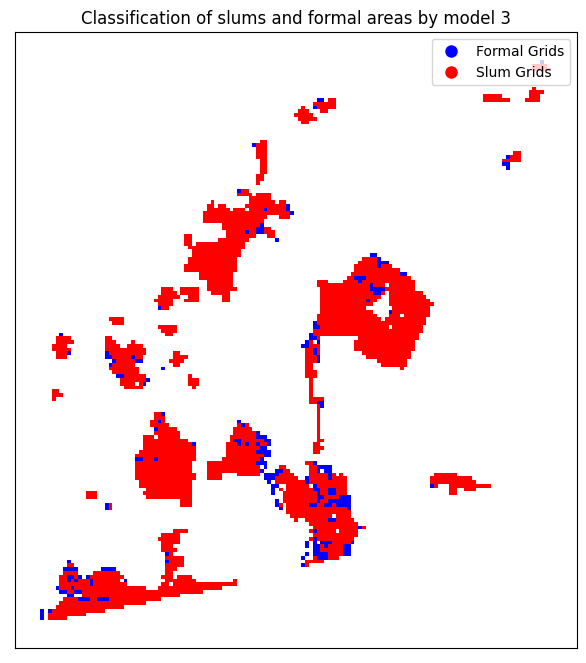

In [123]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = accra_df_2[accra_df_2['pred_m3'] == 0]
slum_grids = accra_df_2[accra_df_2['pred_m3'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Classification of slums and formal areas by model 3')

plt.savefig(save_path + 'accra_slum_only_prediction_model_3.png')

# Show the plot
plt.show()

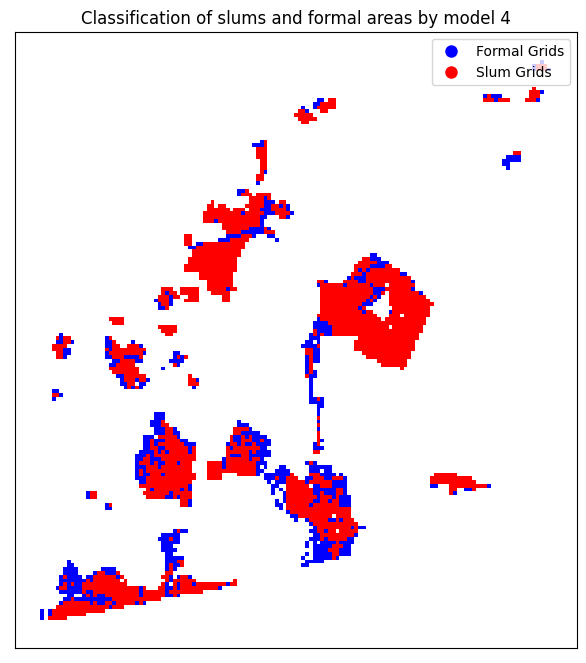

In [124]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = accra_df_2[accra_df_2['pred_m4'] == 0]
slum_grids = accra_df_2[accra_df_2['pred_m4'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Classification of slums and formal areas by model 4')

plt.savefig(save_path + 'accra_slum_only_prediction_model_4.png')

# Show the plot
plt.show()

In [126]:
## all accra new ROI grids 
acc_path = '/home/jovyan/private/Thesis/Accra/Accra_100mGrids/'
acc_grids_df = gpd.read_file(acc_path + 'acc_100m_newROI.shp')

In [127]:
acc_grids_df.head(), acc_grids_df.shape

(   ORIG_FID  ZonalSt_Sl      NDVI  Dist_ATM  Dist_Banks  Dist_Clin  Dist_Col  \
 0     78483     2.40774  0.294069   14189.1     9176.06    6923.15   14972.3   
 1     78488     3.48323  0.217534   13703.3     8697.70    6846.90   14724.8   
 2     78489     3.34363  0.217432   13606.2     8602.33    6835.93   14676.9   
 3     78490     1.74074  0.223614   13509.3     8507.06    6826.42   14629.4   
 4     78491     1.95776  0.184347   13412.3     8411.90    6818.36   14582.5   
 
    Dist_ComC  Dist_Hosp  Dist_Indus  ...  bSqu_Gini_  bSqu_Shann  bSqu_Simps  \
 0    19163.8   10609.90     7121.80  ...    0.964633    0.000000    1.000000   
 1    18700.3   10120.30     6824.22  ...    0.969787    0.000000    1.000000   
 2    18607.8   10022.50     6767.57  ...    0.961144    0.099623    0.960017   
 3    18515.4    9924.72     6711.93  ...    0.966591    0.088320    0.965528   
 4    18423.1    9827.00     6657.33  ...    0.957750    0.094792    0.962365   
 
    bSqu_Theil  bERI_Gin

In [128]:
# Drop the specified columns
acc_grids_df_filtered = acc_grids_df.drop(columns=['ORIG_FID','geometry'])

acc_grids_df_filtered.shape

(42621, 113)

In [129]:
# Make predictions on the accra dataset
accra_pred_ROI_m3 = best_rf_model_3.predict(acc_grids_df_filtered)
accra_pred_ROI_m3

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



array([0, 0, 0, ..., 0, 0, 0])

In [130]:
# prepare data for top 20 features fot the final model predictions 
# Now you can use the top 20 features to train a second model
top_20_features_m3 = top_features_df['Feature'].tolist()
pred_acc_ROI_top_20_m3 = acc_grids_df_filtered[top_20_features_m3]
pred_acc_ROI_top_20_m3.shape, pred_acc_ROI_top_20_m3.columns

((42621, 20),
 Index(['sdcArea_m', 'ltbIBD_m', 'building_c', 'mdcAre_m', 'sdcArea_Si',
        'blg_densit', 'sicCAR_m', 'mtcWNe_m', 'Dist_Sch', 'mtbNDi_m',
        'sdcLAL_m', 'sicFAR_m', 'licGDe_m', 'Dist_Dump', 'midRea_m',
        'sdcArea_Sh', 'bArea_Gini', 'ltcWRB_m', 'sdsSPO_m', 'sdsSPW_m'],
       dtype='object'))

In [131]:
# Make predictions on the test set
accra_pred_4_ROI = best_rf_model_4.predict(pred_acc_ROI_top_20_m3)
accra_pred_4_ROI

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
# Add the predictions as a new column to 'test_data'
acc_grids_df['pred_m3'] = accra_pred_ROI_m3

# Now 'test_data' contains a new column called 'predictions' with the predicted values
acc_grids_df.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,geometry,pred_m3
0,78483,2.40774,0.294069,14189.1,9176.06,6923.15,14972.3,19163.8,10609.90,7121.80,...,0.000000,1.000000,3.370491,0.009189,0.620571,0.570668,0.000225,0.0004,"POLYGON ((791166.663 627908.135, 791066.663 62...",0
1,78488,3.48323,0.217534,13703.3,8697.70,6846.90,14724.8,18700.3,10120.30,6824.22,...,0.000000,1.000000,3.505049,0.007779,0.263166,0.863271,0.000474,0.0002,"POLYGON ((791666.663 627908.135, 791566.663 62...",0
2,78489,3.34363,0.217432,13606.2,8602.33,6835.93,14676.9,18607.8,10022.50,6767.57,...,0.099623,0.960017,3.202754,0.009673,0.371776,0.785090,0.000482,0.0002,"POLYGON ((791766.663 627908.135, 791666.663 62...",0
3,78490,1.74074,0.223614,13509.3,8507.06,6826.42,14629.4,18515.4,9924.72,6711.93,...,0.088320,0.965528,3.353893,0.008350,0.372481,0.784549,0.000388,0.0001,"POLYGON ((791866.663 627908.135, 791766.663 62...",0
4,78491,1.95776,0.184347,13412.3,8411.90,6818.36,14582.5,18423.1,9827.00,6657.33,...,0.094792,0.962365,3.017762,0.009288,0.411521,0.753386,0.000421,0.0002,"POLYGON ((791966.663 627908.135, 791866.663 62...",0


In [133]:
# Add the predictions as a new column to 'test_data'
acc_grids_df['pred_m4'] = accra_pred_4_ROI

# Now 'test_data' contains a new column called 'predictions' with the predicted values
acc_grids_df.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,geometry,pred_m3,pred_m4
0,78483,2.40774,0.294069,14189.1,9176.06,6923.15,14972.3,19163.8,10609.90,7121.80,...,1.000000,3.370491,0.009189,0.620571,0.570668,0.000225,0.0004,"POLYGON ((791166.663 627908.135, 791066.663 62...",0,0
1,78488,3.48323,0.217534,13703.3,8697.70,6846.90,14724.8,18700.3,10120.30,6824.22,...,1.000000,3.505049,0.007779,0.263166,0.863271,0.000474,0.0002,"POLYGON ((791666.663 627908.135, 791566.663 62...",0,0
2,78489,3.34363,0.217432,13606.2,8602.33,6835.93,14676.9,18607.8,10022.50,6767.57,...,0.960017,3.202754,0.009673,0.371776,0.785090,0.000482,0.0002,"POLYGON ((791766.663 627908.135, 791666.663 62...",0,0
3,78490,1.74074,0.223614,13509.3,8507.06,6826.42,14629.4,18515.4,9924.72,6711.93,...,0.965528,3.353893,0.008350,0.372481,0.784549,0.000388,0.0001,"POLYGON ((791866.663 627908.135, 791766.663 62...",0,0
4,78491,1.95776,0.184347,13412.3,8411.90,6818.36,14582.5,18423.1,9827.00,6657.33,...,0.962365,3.017762,0.009288,0.411521,0.753386,0.000421,0.0002,"POLYGON ((791966.663 627908.135, 791866.663 62...",0,0


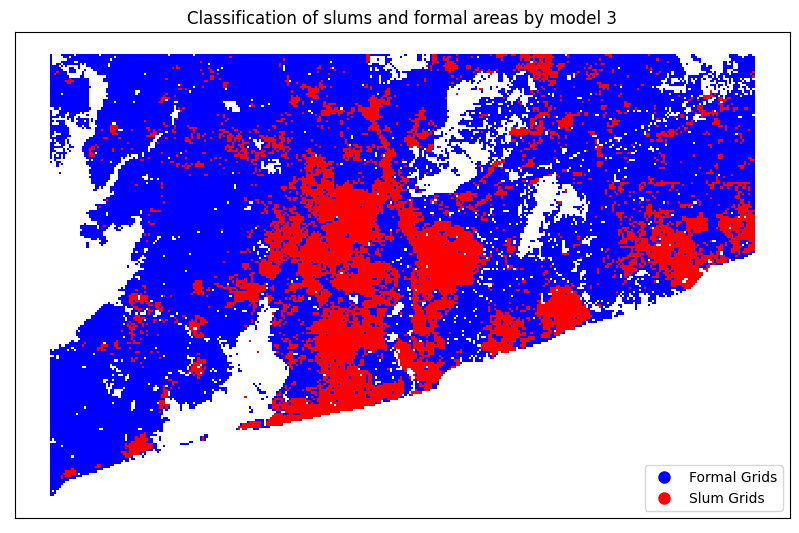

In [135]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = acc_grids_df[acc_grids_df['pred_m3'] == 0]
slum_grids = acc_grids_df[acc_grids_df['pred_m3'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles, loc='lower right')

plt.title('Classification of slums and formal areas by model 3')

plt.savefig(save_path + 'accra_ROI_allgrids_prediction_model_3.png')

# Show the plot
plt.show()

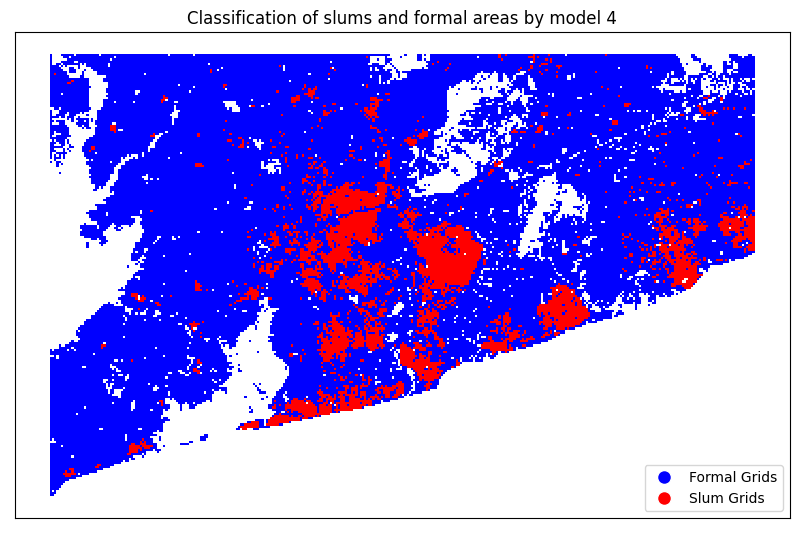

In [136]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = acc_grids_df[acc_grids_df['pred_m4'] == 0]
slum_grids = acc_grids_df[acc_grids_df['pred_m4'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles, loc='lower right')

plt.title('Classification of slums and formal areas by model 4')

plt.savefig(save_path + 'accra_ROI_allgrids_prediction_model_4.png')

# Show the plot
plt.show()

In [137]:
save_path = '/home/jovyan/private/Thesis/Accra/Accra_Prediction/'

acc_grids_df.to_file(save_path + 'Acc_final_Predictions_m3_m4.shp')

In [138]:
accra_df_2.head()

,ORIG_FID,ZonalSt_Sl,NDVI,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Hosp,Dist_Indus,...,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,geometry,pred_m3,pred_m4
0,94226,2.76836,0.151978,1077.03,905.539,1118.030,860.233,2701.85,943.398,1878.83,...,3.797485,0.014905,0.709345,0.646389,0.001503,0.0023,1,"POLYGON ((814266.663 625308.135, 814166.663 62...",0,0
1,94806,2.34338,0.082633,1118.03,854.400,1253.000,640.312,2507.99,1077.030,1655.29,...,3.160233,0.012030,0.607111,0.675971,0.001012,0.0040,1,"POLYGON ((814066.663 625208.135, 813966.663 62...",1,0
2,94807,2.47631,0.075246,1140.18,824.621,1166.190,721.110,2607.68,984.886,1746.42,...,3.258889,0.016466,0.525963,0.709903,0.001583,0.0058,1,"POLYGON ((814166.663 625208.135, 814066.663 62...",1,1
3,94808,1.89663,0.068832,1170.47,806.226,1077.030,806.226,2707.40,894.427,1838.48,...,2.302371,0.024202,0.909508,0.502237,0.002420,0.0042,1,"POLYGON ((814266.663 625208.135, 814166.663 62...",1,1
4,94809,1.28245,0.068162,1208.30,800.000,984.886,894.427,2692.58,806.226,1931.32,...,2.479982,0.014327,0.664321,0.646705,0.001041,0.0043,1,"POLYGON ((814366.663 625208.135, 814266.663 62...",1,1


In [139]:
save_path = '/home/jovyan/private/Thesis/Accra/Accra_Prediction/'

accra_df_2.to_file(save_path + 'Acc_slums_with_Predictions_m3_m4.shp')

In [208]:
save_path = '/home/jovyan/private/Thesis/nai_predictions/'
data = gpd.read_file(save_path + 'final_predictions_model3_model4.shp')
data.columns

Index(['ORIG_FID', 'Dist_ATM', 'Dist_Banks', 'Dist_Clin', 'Dist_Col',
       'Dist_ComC', 'Dist_Dump', 'Dist_Hosp', 'Dist_Indus', 'Dist_Kind',
       ...
       'bSqu_Theil', 'bERI_Gini_', 'bERI_Shann', 'bERI_Simps', 'bERI_Theil',
       'grid_area', 'blg_densit', 'prediction', 'predicti_1', 'geometry'],
      dtype='object', length=121)